#DL4H_Team_38_Final_Project

#Authors:
####Eric Chen(echen40), Li-Kai Lin(likaikl2), Peng-Yuan Huang(pyh2)

---
#####Github file link: https://github.com/likaikl2/DLH_Team38_Final/DL4H_Team_38_Final_Project.ipynb

#####Video Presentation YouTube link: https://youtu.be/fGT4E_Cy3rI

# Introduction

The goal of this study is to predict heart failure risk in patients based on their electronic health record (EHR) data. Early identification of high-risk patients could enable timely interventions and improved outcomes. However, accurately predicting heart failure risk remains challenging,
especially when EHR data is limited. This study aims to validate whether the Domain Knowledge Guided Recurrent Neural Networks (DG-RNN) model, which incorporates medical domain knowledge via a knowledge graph and utilizes various architectural components, can outperform existing risk prediction models and provide interpretable results.


# Scope of Reproducibility:

List hypotheses from the paper you will test and the corresponding experiments you will run.

1. Hypothesis 1: Incorporating domain knowledge from a medical knowledge graph (e.g. KnowLife or UMLS) into a deep
learning model (DG-RNN) will significantly improve the performance of clinical risk
prediction compared to models that do not utilize domain knowledge.
2. Hypothesis 2: The dynamic attention mechanism in DG-RNN, which integrates relevant information from
the medical knowledge graph at each step, will contribute to better risk prediction
performance compared to models with static or no attention mechanisms.
3. Hypothesis 3: The global max pooling operation in DG-RNN will improve the model's performance.
4. Hypothesis 4: The incorporation of time encodings in DG-RNN, which capture the irregular time intervals
between EHR events, will lead to improved risk prediction performance compared to models that do not consider temporal information.
5. Hypothesis 5: The pre-training of medical concept and relation embeddings using TransE will provide a meaningful initialization for DG-RNN, contributing to its superior performance.




# Methodology

This methodology is the core of your project. It consists of run-able codes with necessary annotations to show the expeiment you executed for testing the hypotheses.

The methodology at least contains two subsections **data** and **model** in your experiment.

## Environment Setup

### Python version

In [ ]:
import sys
print(f"Python version: {sys.version}")

Python version: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


### PyTorch Version

In [ ]:
import torch
print(f"PyTorch version: {torch.__version__}")

PyTorch version: 2.2.1+cu121


### Dependencies/packages needed

In [ ]:
import os
import time
import numpy as np
from sklearn import metrics
import random
import json
import collections
from tqdm import tqdm
from copy import deepcopy

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


PyHealth

In [ ]:
!pip install pyhealth

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.6/311.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 37.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.9/140.9 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.

##  **Data Preprocess**


###**Data download**

All data will be automatically downloaded by running the following commands.

In [ ]:
!pip install gdown

!gdown https://drive.google.com/drive/folders/1Ab5KF4r31fQjtotlTgmlvwRqt1RenXCo?usp=sharing -O /content/Team_38_Dataset --folder

Retrieving folder contents
Retrieving folder 1O7rsmBB8-SFidRbR-ejNXG9M0MnaICm4 Demo_Data
Processing file 1-4P1mmAt6G9s6G1zt3_aMlA8DVFTKIKO ADMISSIONS.csv
Processing file 1-2XnIL-Z3gfZ-epmokEP4nojfjEk3MGW DIAGNOSES_ICD.csv
Processing file 1-D_v4tc98EjhaKSbuUIXd0Veu8ZKSu_X PATIENTS.csv
Retrieving folder 1c4Vb7c_jI0hjZ-Ayb2hPAPal1XoqBb2P KnowLife
Processing file 1KWmhNaxKNyoPdM7SM723qXOcvney1Dbi entity_embeddings.pt
Processing file 1j5vs-ZP_N7T3Oi0Uu7HVb-pATTyrSJRk entity2id.json
Retrieving folder 1-A0meZdbWtsggcXGH6c2Zh6kPePqOFpp exp1
Processing file 1I596fy4sD7FW1YGfpkXBVH8j8Eldv9bj best.ckpt
Processing file 15N_RrQ-v4w9BHo2H7KYD_IMBM-fKfNtn last.ckpt
Processing file 1-2BEZlFC236HB2fzg0Rcse-unLMmJKms graph.txt
Processing file 1AWNVBHIndwxZ-Zt2T9XnmUhQChklOTB9 knowlife.csv
Processing file 1QYS0tbdYKqooVVU3U5eOBsdZAD_9EDKC relation_embeddings.pt
Processing file 1oa3pInkc_2SFG6aJbmKHxCts8leG_B_e relation2id.json
Retrieving folder 1D0Jhfp1O8RhiO0wNRFuttjdiq31_0CG_ MIMIC-III
Processing file 

###**Case-control matching**

(Version 1)

In this code, we first load the MIMIC-III dataset using the PyHealth library. We define the ICD-9 codes for heart failure and the desired prediction window (120 days in this example).

Next, we identify case patients based on the presence of heart failure diagnosis codes. For each case patient, we find control patients with similar age (within a 5-year range) and gender who do not have a heart failure diagnosis before the index date of the case patient. We randomly select a fixed number of control patients (num_controls) for each case patient and assign them the same index date.

After matching case and control patients, we combine them into a single dataset. We then extract the EHR data for each patient within the specified prediction window.

Finally, we can perform further data preprocessing and feature selection on the matched dataset, such as converting diagnosis codes to a higher-level representation, removing infrequent events, and focusing on diagnosis-related events.

In [ ]:
from ast import And
import pyhealth
from pyhealth.datasets import MIMIC3Dataset
import pandas as pd
from sklearn.model_selection import train_test_split

# Specify the root directory of the MIMIC-III dataset
#mimic_root = '/content/Team_38_Dataset/MIMIC-III'
mimic_root = '/content/Team_38_Dataset/Demo_Data'

# Specify the tables to load from the MIMIC-III dataset
mimic_tables = ['DIAGNOSES_ICD']

# Initialize the MIMIC-III dataset
mimic = MIMIC3Dataset(root=mimic_root, tables=mimic_tables)

# Define the ICD-9 codes for heart failure (HF)
hf_codes = [
    '428', '4280', '4281', '4282', '42820', '42821', '42822', '42823',
    '4283', '42830', '42831', '42832', '42833', '4284', '42840', '42841',
    '42842', '42843', '4289', '40201', '40211', '40291', '40401', '40403',
    '40411', '40413', '40491', '40493'
]

# Define the number of controls per case
num_controls = 3

# Initialize an empty dictionary to store patients' data
patients_data = {}

patients_data = mimic.parse_basic_info(patients_data)
patients_data = mimic.parse_diagnoses_icd(patients_data)


# Create a list to store the case and control patients
case_patients = []
control_patients = []

# print(patients_data[list(patients_data.keys())[1]])

# Iterate over each patient in the patients_data dictionary
for patient_id, patient_info in patients_data.items():
    # Get the patient's visits
    visits = patient_info.visits

    # Check if the patient has heart failure diagnosis
    for visit_id, visit in visits.items():
        for diagnosis in visit.get_code_list('DIAGNOSES_ICD'):
            if diagnosis in hf_codes:
                case_patients.append(patient_id)
            else:
                control_patients.append(patient_id)

max_year = 0

for case_patient_id in case_patients:
    if patients_data[case_patient_id].death_datetime is not None and patients_data[case_patient_id].death_datetime.year > max_year:
        max_year = patients_data[case_patient_id].death_datetime.year


# Create a list to store the matched control patients
matched_controls = []
matched_control_patients = []

# Iterate over each case patient
for case_patient_id in case_patients:
    # Get the case patient's age and gender
    if patients_data[case_patient_id].death_datetime is None:
        case_age = max_year - patients_data[case_patient_id].birth_datetime.year
    else:
        case_age = patients_data[case_patient_id].death_datetime.year - patients_data[case_patient_id].birth_datetime.year

    case_gender = patients_data[case_patient_id].gender

    # Find control patients with similar age and gender
    # Temporarily disable the age filter for smaller dataset. This filter will be
    # re-enabled in the formal final report.
    for patient_id in control_patients:
        # if patients_data[patient_id].death_datetime is None:
        #     patient_age = max_year - patients_data[patient_id].birth_datetime.year
        # else:
        #     patient_age = patients_data[patient_id].death_datetime.year - patients_data[patient_id].birth_datetime.year
        if (
            # patient_age >= case_age - 5 and
            # patient_age <= case_age + 5 and
            patients_data[patient_id].gender == case_gender
        ):
            matched_control_patients.append(patient_id)

    # Randomly select num_controls control patients
    selected_controls = pd.Series(matched_control_patients).sample(n=num_controls, random_state=42)

    # Add the selected control patients to the matched controls list
    matched_controls.extend(selected_controls)

# Combine case patients and matched control patients
case_control_patient_ids = case_patients + matched_controls

# Create a new dictionary with case-control patients' data
case_control_patients_data = {patient_id: patients_data[patient_id] for patient_id in case_control_patient_ids}

INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


finish basic patient information parsing : 0.8151776790618896s


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


finish parsing DIAGNOSES_ICD : 0.4181532859802246s


Mapping codes: 100%|██████████| 93/93 [00:00<00:00, 28381.13it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


###**Data Extraction**


(Version 1)


In this code:

1. Since we have already performed case-control matching and obtained the matched patient IDs, which are stored in the `case_control_patient_ids` list, we first list all IDs in the `case_control_patient_ids`.
2. We initialize an empty dictionary called `extracted_data` to store the extracted data for each matched patient.
3. We iterate over each matched patient ID and extract the relevant information:
  - Basic patient information (age and gender) is extracted from the patients_data dictionary.
  - Diagnoses, procedures, prescriptions, and lab events are extracted from the patient's visits in the `patients_data` dictionary.
5. The extracted data for each patient is appended to the corresponding lists in the `extracted_data` dictionary.
6. After extracting data for all matched patients, we convert the `extracted_data` dictionary into a pandas DataFrame called `extracted_df`.
7. Finally, we save the extracted data to a file (e.g., CSV) using the `to_csv()` method of the `DataFrame`.

In [ ]:
# Initialize an empty dictionary to store the extracted data
extracted_data = {
    'patient_id': [],
    'age': [],
    'gender': [],
    'diagnoses': [],
    'is_case': []
}


# Iterate over each matched patient ID
for patient_id in case_control_patient_ids:
    # Get the patient's basic information
    patient_info = patients_data[patient_id]

    # Extract age and gender
    if patient_info.death_datetime is None:
        age = max_year - patient_info.birth_datetime.year
    else:
        age = patient_info.death_datetime.year - patient_info.birth_datetime.year
    gender = patient_info.gender

    is_case = []

    # Extract diagnoses
    diagnoses = []
    for visit_id, visit in patient_info.visits.items():
        for diagnosis in visit.get_code_list('DIAGNOSES_ICD'):
            if diagnosis in hf_codes:
                is_case.append('1')
            else:
                is_case.append('0')
            diagnoses.append(diagnosis)

    # Append the extracted data to the dictionary
    extracted_data['patient_id'].append(patient_id)
    extracted_data['age'].append(age)
    extracted_data['gender'].append(gender)
    extracted_data['diagnoses'].append(diagnoses)
    extracted_data['is_case'].append(is_case[0])

# Convert the extracted data into a pandas DataFrame
extracted_df = pd.DataFrame(extracted_data)

# Perform further data preprocessing, feature engineering, and analysis on the extracted DataFrame
# ...

# Save the extracted data to a file if needed
extracted_df.to_json('/content/Team_38_Dataset/Pre-Processed/extracted_data.json', orient='records')

###**Data Split**


(Version 1)


In this code:

1. We separate the features (`X`) and the target variable (`y`) from the `final_df` DataFrame.
2. We split the data into training, validation, and testing sets using the `train_test_split()` function from `scikit-learn`. We first split the data into training and temporary sets with a test size of 0.3 (i.e., 30% of the data). Then, we further split the temporary set into validation and testing sets with a test size of 0.5 (i.e., 50% of the temporary set). We use stratified splitting by specifying `stratify=y` to ensure that the class distribution is maintained in each split.
3. We convert the split data to PyTorch tensors using `torch.tensor()`. The features are converted to `float32` tensors, and the target variable is converted to `float32` tensors and reshaped to have an additional dimension using `unsqueeze(1)`.
4. We create PyTorch datasets using `torch.utils.data.TensorDataset()` for the training, validation, and testing splits. Each dataset is created by passing the corresponding feature and target tensors.
5. We create PyTorch dataloaders using `torch.utils.data.DataLoader()` for the training, validation, and testing datasets. The dataloaders allow for efficient batch-wise data loading and shuffling during training. We can specify the batch size and whether to shuffle the data using the `batch_size` and shuffle parameters.
6. Finally, we save the split datasets to files using `torch.save()`. This allows us to load the datasets directly in the future without repeating the splitting process.

In [ ]:
from sklearn.model_selection import train_test_split

final_df = extracted_df

# Separate features and target variable
X = final_df.drop('is_case', axis=1)
y = final_df['is_case']

# This section could probably be removed with larger dataset.
# Remove samples with the minority class
minority_class = y.value_counts().idxmin()
mask = y != minority_class
X = X[mask]
y = y[mask]

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Create DataFrames for each split
train_df = pd.concat([X_train, y_train], axis=1)
val_df = pd.concat([X_val, y_val], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

# Save the split datasets to JSON files
train_df.to_json('/content/Team_38_Dataset/train.json', orient='records')
val_df.to_json('/content/Team_38_Dataset/valid.json', orient='records')
test_df.to_json('/content/Team_38_Dataset/test.json', orient='records')

### KnowLife

Currently, the Knowlife dataset is no longer accessible. Here we attempted to derive embeddings from the evaluation files in the original knowlife paper. But due to limited results, we decided not to use it in favor of UMLS.

####Preprocessing

In [ ]:
import os
import pandas as pd
import pyhealth
import string
from pyhealth.medcode import CrossMap

process_graph = False

if process_graph:

    knowlife_path = '/content/Team_38_Dataset/KnowLife/'
    input_file = 'knowlife.csv'
    output_file = 'graph.txt'

    # UMLS to ICD9CM tools
    translator = str.maketrans('', '', string.punctuation)
    mapping = CrossMap("UMLS", "ICD9CM")

    # Read file and filter out rows where relation != causes and correct != t
    df = pd.read_csv(knowlife_path + input_file, header=0, names=['head','relation','tail','correct'])
    df = df.loc[(df['correct']=='t') & (df['relation']=='causes')].drop(columns=['correct'])

    # Map UMLS to ICD9CM
    df['head'] = df['head'].apply(lambda c: mapping.map(c))
    df['tail'] = df['tail'].apply(lambda c: mapping.map(c))

    # Turn many-to-many mappings to one-to-one mappings
    df = df.explode('head').explode('tail')

    # Drop rows without mapping
    df = df.dropna()

    # Remove periods/punctuation from ICD9CM
    df['head'] = df['head'].apply(lambda c: c.translate(translator))
    df['tail'] = df['tail'].apply(lambda c: c.translate(translator))

    # Create is-caused-by graph and concatenate with causes graph
    df_reverse = df.copy()
    df_reverse['head'], df_reverse['tail'] = df_reverse['tail'], df_reverse['head']
    df_reverse['relation'] = 'is-caused-by'
    df = pd.concat([df,df_reverse]).drop_duplicates()

    # Write to drive
    df.to_csv(knowlife_path + output_file, sep='\t', header=False, index=False)

####Embedding Generation

In [ ]:
# Taken from https://github.com/sunlabuiuc/PyHealth/blob/4febba6061253c4c178fa035d2afa67e206fc9a8/pyhealth/medcode/pretrained_embeddings/kg_emb/examples/train_kge_model.py
from pyhealth.medcode.pretrained_embeddings.kg_emb.datasets import UMLSDataset, split
from pyhealth.medcode.pretrained_embeddings.kg_emb.tasks import link_prediction_fn
from pyhealth.datasets import get_dataloader
from pyhealth.medcode.pretrained_embeddings.kg_emb.models import TransE
from pyhealth.trainer import Trainer
from pyhealth.medcode import InnerMap
import torch
import json
import pickle

generate_embedding = False
load_best_checkpoint = True
load_last_checkpoint = False

if generate_embedding:

    knowlife_path = '/content/Team_38_Dataset/KnowLife/'
    experiment = 'exp1'

    # dataset is KnowLife even though we used UMLSDataset class
    ds = UMLSDataset(root=knowlife_path, dev=False)

    # check the dataset statistics before setting task
    print(ds.stat())

    # check the relation numbers in the dataset
    print("Relations in KG:", ds.relation2id)

    ds = ds.set_task(link_prediction_fn, negative_sampling=64, save=False)

    # check the dataset statistics after setting task
    print(ds.stat())

    # split the dataset and get the dataloaders
    train_dataset, val_dataset, test_dataset = split(ds, [0.8, 0.1, 0.1])
    train_loader = get_dataloader(train_dataset, batch_size=8, shuffle=True)
    val_loader = get_dataloader(val_dataset, batch_size=2, shuffle=False)
    test_loader = get_dataloader(test_dataset, batch_size=2, shuffle=False)

    # initialize TransE model
    model = TransE(dataset=ds, e_dim=512, r_dim=512)

    if load_best_checkpoint:
        # load best checkpoint
        state_dict = torch.load(knowlife_path + experiment + "/best.ckpt", map_location=torch.device(device))
        model.load_state_dict(state_dict)
        print('Loaded best checkpoint: ', model)
    else:
        # load last checkpoint
        if load_last_checkpoint:
            state_dict = torch.load(knowlife_path + experiment + "/last.ckpt", map_location=torch.device(device))
            model.load_state_dict(state_dict)
            print('Loaded last checkpoint: ', model)

        # train model
        trainer = Trainer(
            model=model,
            device=device,
            metrics=['hits@n', 'mean_rank'],
            output_path=knowlife_path,
            exp_name=experiment
        )

        trainer.train(
            train_dataloader=train_loader,
            val_dataloader=val_loader,
            epochs=200,
            optimizer_params={'lr': 1e-3},
            monitor='mean_rank',
            monitor_criterion='min'
        )

        # evaluate model
        trainer.evaluate(test_loader)

    # save entity2id and relation2id
    with open(knowlife_path + experiment + "/entity2id.json", "w") as f:
        json.dump(ds.entity2id, f, indent=4)
    with open(knowlife_path + experiment + "/relation2id.json", "w") as f:
        json.dump(ds.relation2id, f, indent=4)

    # save entity and relation embeddings
    torch.save(model.E_emb, knowlife_path + experiment + "/entity_embeddings.pt")
    torch.save(model.R_emb, knowlife_path + experiment + "/relation_embeddings.pt")


###UMLS

####Preprocessing

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
import os
import pandas as pd
import pyhealth
import string
from pyhealth.medcode import CrossMap

process_graph = True

if process_graph:

    umls_path = '/content/Team_38_Dataset/UMLS/'
    input_file = 'MRREL.RRF.zip'
    output_file = 'graph.txt'

    # UMLS to ICD9CM tools
    translator = str.maketrans('', '', string.punctuation)
    mapping = CrossMap("UMLS", "ICD9CM")

    # Read file and filter out rows where relation != cause_of
    df = pd.read_csv(umls_path + input_file, sep='|', header=None, usecols=[0,4,7], dtype='string')
    df.columns = ['tail','head','relation']
    df = df[['head','relation','tail']]
    df = df.loc[df['relation'] == 'cause_of']
    df['relation'] = 'causes'

    # Map UMLS to ICD9CM
    df['head'] = df['head'].apply(lambda c: mapping.map(c))
    df['tail'] = df['tail'].apply(lambda c: mapping.map(c))

    # Turn many-to-many mappings to one-to-one mappings
    df = df.explode('head').explode('tail')

    # Drop rows without mapping
    df = df.dropna()

    # Remove periods/punctuation from ICD9CM
    df['head'] = df['head'].apply(lambda c: c.translate(translator))
    df['tail'] = df['tail'].apply(lambda c: c.translate(translator))

    # Create is-caused-by graph and concatenate with causes graph
    df_reverse = df.copy()
    df_reverse['head'], df_reverse['tail'] = df_reverse['tail'], df_reverse['head']
    df_reverse['relation'] = 'is-caused-by'
    df = pd.concat([df,df_reverse]).drop_duplicates()

    # Write to drive
    df.to_csv(umls_path + output_file, sep='\t', header=False, index=False)

<ipython-input-13-437535a6dd83>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['relation'] = 'causes'
<ipython-input-13-437535a6dd83>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['head'] = df['head'].apply(lambda c: mapping.map(c))


#### Preprocessing Visualization

The visualization below represents the relationships between ICD9CM codes in the dataset using a directed graph. Each node in the graph corresponds to a unique ICD9CM code, and the edges between nodes indicate the presence and direction of relationships between the codes.

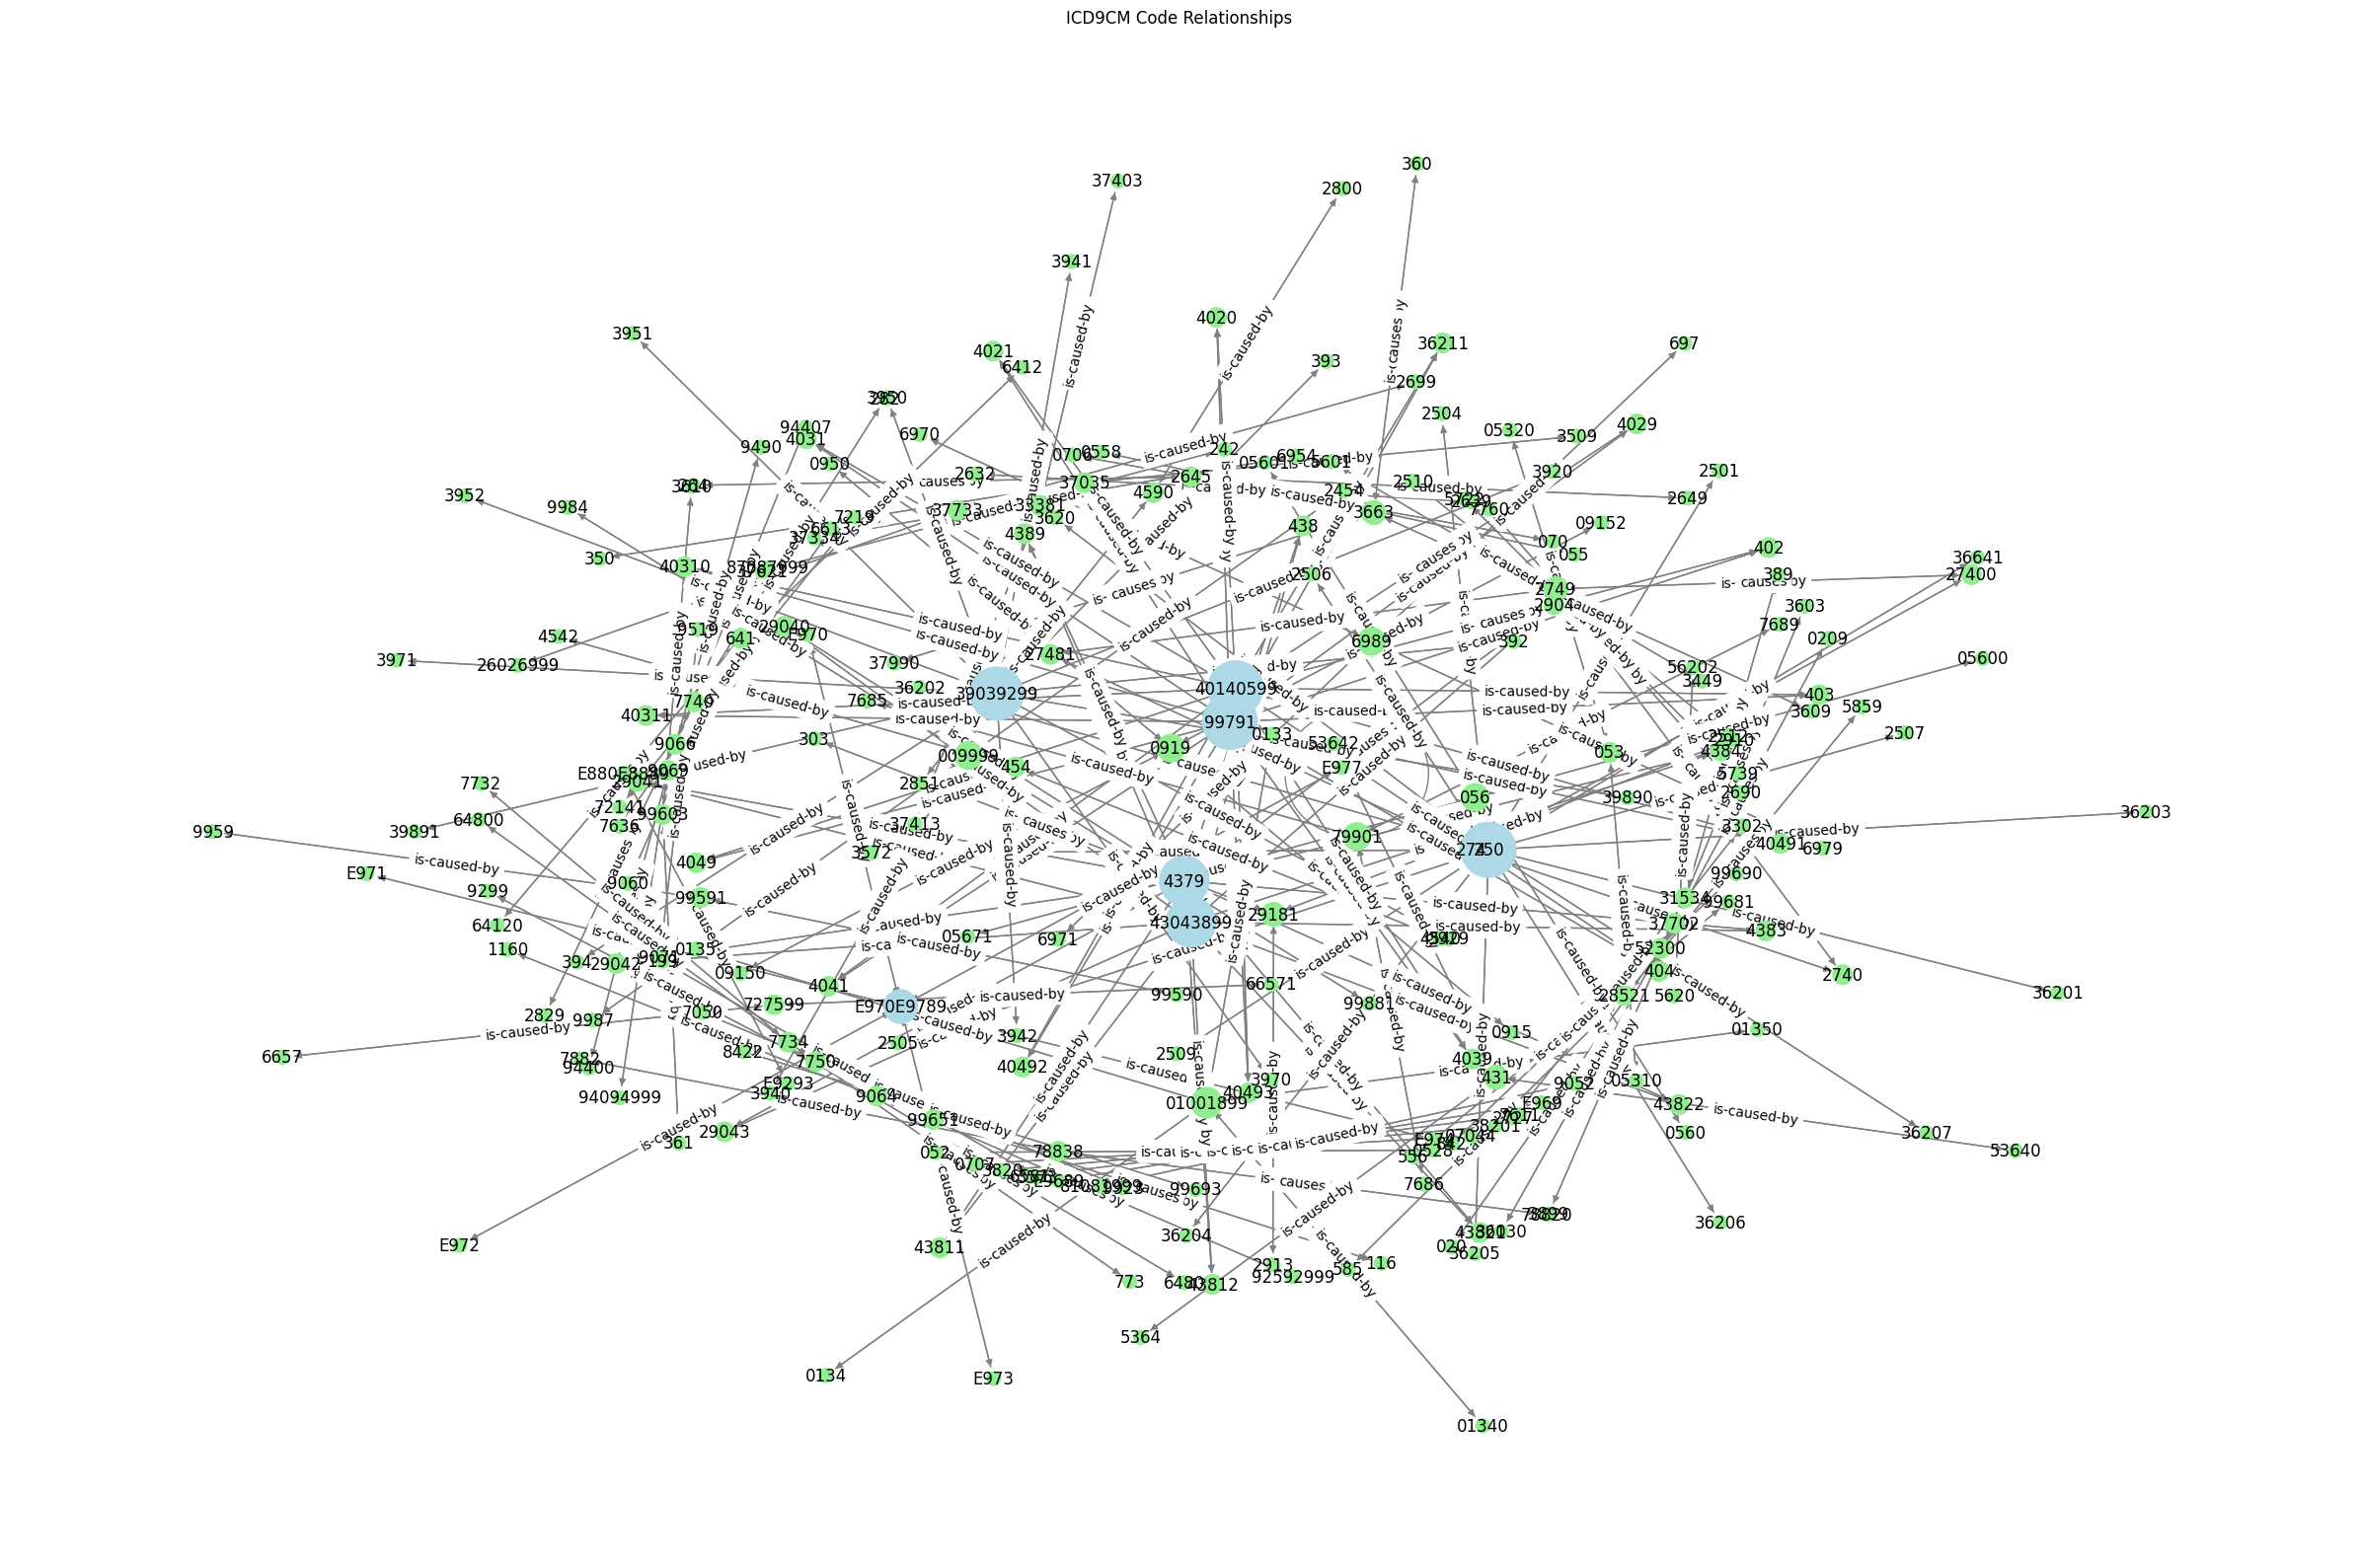

In [ ]:
if process_graph:
  # Create a directed graph
  G = nx.DiGraph()

  # Add edges to the graph
  for _, row in df.iterrows():
      G.add_edge(row['head'], row['tail'], relation=row['relation'])

  # Compute node positions using a different layout algorithm
  pos = nx.kamada_kawai_layout(G)

  # Customize node appearance based on a metric or attribute
  node_sizes = [G.degree(node) * 50 for node in G.nodes()]
  node_colors = ['lightblue' if G.degree(node) > 10 else 'lightgreen' for node in G.nodes()]

  # Draw the graph
  plt.figure(figsize=(24, 16))
  nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors)
  nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)
  nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')

  # Customize edge labels
  edge_labels = nx.get_edge_attributes(G, 'relation')
  nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

  plt.title('ICD9CM Code Relationships')
  plt.axis('off')
  plt.tight_layout()
  plt.show()

After preprocessing the dataset and removing periods and punctuation from the ICD9CM codes, it's important to understand the distribution of unique codes within the dataset. This visualization provides insights into the frequency and prevalence of different ICD9CM codes.
The histogram below shows the distribution of unique ICD9CM codes in the dataset. Each bar represents a specific ICD9CM code, and the height of the bar indicates the frequency or count of that code's occurrence in the dataset.

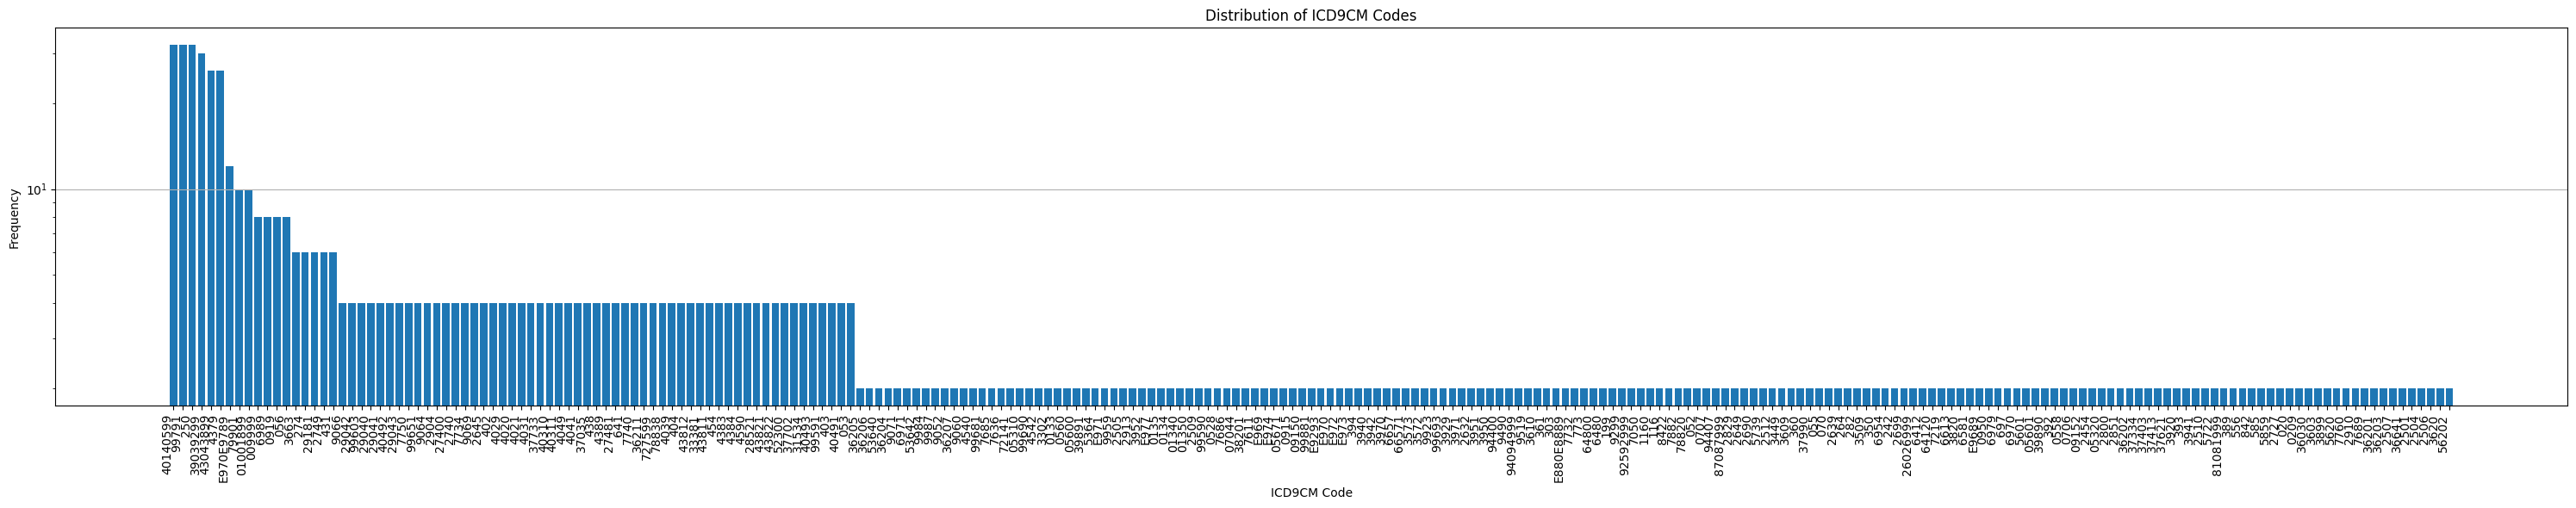

In [ ]:
if process_graph:
  # Count the frequency of each ICD9CM code
  code_counts = pd.concat([df['head'], df['tail']]).value_counts()

  # Create a histogram
  plt.figure(figsize=(30, 6))
  plt.bar(code_counts.index, code_counts.values)
  plt.xlabel('ICD9CM Code')
  plt.ylabel('Frequency')
  plt.title('Distribution of ICD9CM Codes')
  plt.xticks(rotation=90, ha='right')
  plt.yscale('log')
  plt.grid(axis='y')
  plt.tight_layout()
  plt.show()

####Embedding Generation

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [ ]:
# Taken from https://github.com/sunlabuiuc/PyHealth/blob/4febba6061253c4c178fa035d2afa67e206fc9a8/pyhealth/medcode/pretrained_embeddings/kg_emb/examples/train_kge_model.py
from pyhealth.medcode.pretrained_embeddings.kg_emb.datasets import UMLSDataset, split
from pyhealth.medcode.pretrained_embeddings.kg_emb.tasks import link_prediction_fn
from pyhealth.datasets import get_dataloader
from pyhealth.medcode.pretrained_embeddings.kg_emb.models import TransE
from pyhealth.trainer import Trainer
from pyhealth.medcode import InnerMap
import torch
import json

generate_embedding = True
load_best_checkpoint = True
load_last_checkpoint = False

if generate_embedding:

    umls_path = '/content/Team_38_Dataset/UMLS/'
    experiment = 'exp1'

    # dataset is KnowLife even though we used UMLSDataset class
    ds = UMLSDataset(root=umls_path, dev=False)

    # check the dataset statistics before setting task
    print(ds.stat())

    # check the relation numbers in the dataset
    print("Relations in KG:", ds.relation2id)

    ds = ds.set_task(link_prediction_fn, negative_sampling=64, save=False)

    # check the dataset statistics after setting task
    print(ds.stat())

    # split the dataset and get the dataloaders
    train_dataset, val_dataset, test_dataset = split(ds, [0.8, 0.1, 0.1])
    train_loader = get_dataloader(train_dataset, batch_size=8, shuffle=True)
    val_loader = get_dataloader(val_dataset, batch_size=2, shuffle=False)
    test_loader = get_dataloader(test_dataset, batch_size=2, shuffle=False)

    # initialize TransE model
    model = TransE(dataset=ds, e_dim=512, r_dim=512)

    if load_best_checkpoint:
        # load best checkpoint
        state_dict = torch.load(umls_path + experiment + "/best.ckpt", map_location=torch.device(device))
        model.load_state_dict(state_dict)
        print('Loaded best checkpoint: ', model)
    else:
        # load checkpoint
        if load_last_checkpoint:
            state_dict = torch.load(umls_path + experiment + "/last.ckpt", map_location=torch.device(device))
            model.load_state_dict(state_dict)
            print('Loaded last checkpoint: ', model)

        # train model
        trainer = Trainer(
            model=model,
            device=device,
            metrics=['hits@n', 'mean_rank'],
            output_path=umls_path,
            exp_name=experiment
        )

        trainer.train(
            train_dataloader=train_loader,
            val_dataloader=val_loader,
            epochs=400,
            optimizer_params={'lr': 1e-3},
            monitor='mean_rank',
            monitor_criterion='min'
        )

        # evaluate model
        trainer.evaluate(test_loader)

    # save entity2id and relation2id
    with open(umls_path + experiment + "/entity2id.json", "w") as f:
        json.dump(ds.entity2id, f, indent=4)
    with open(umls_path + experiment + "/relation2id.json", "w") as f:
        json.dump(ds.relation2id, f, indent=4)

    # save entity and relation embeddings
    torch.save(model.E_emb, umls_path + experiment + "/entity_embeddings.pt")
    torch.save(model.R_emb, umls_path + experiment + "/relation_embeddings.pt")


INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
Loading UMLS knowledge graph...
Processing UMLS knowledge graph...
Building UMLS knowledge graph...


100%|██████████| 416/416 [00:00<00:00, 527776.91it/s]



Statistics of base dataset (dev=False):
	- Dataset: UMLSDataset
	- Number of triples: 416
	- Number of entities: 243
	- Number of relations: 2
	- Task name: Null
	- Number of samples: 0

None
Relations in KG: {'causes': 0, 'is-caused-by': 1}
Processing UMLSDataset base dataset...


100%|██████████| 416/416 [00:00<00:00, 2126.39it/s]


Saving UMLSDataset base dataset to /root/.cache/pyhealth/datasets/219962e656724040a8d6d4c5d2031fce

Statistics of base dataset (dev=False):
	- Dataset: UMLSDataset
	- Number of triples: 416
	- Number of entities: 243
	- Number of relations: 2
	- Task name: link_prediction_fn
	- Task-specific hyperparameters: {'negative_sampling': 64}

None
Loaded best checkpoint:  TransE()


#### Embedding Visualization

In this section, we explore the learned entity embeddings of the TransE model through visualization. Entity embeddings are high-dimensional vector representations that capture the semantic relationships and properties of entities in the knowledge graph.
To visualize these high-dimensional embeddings, we employ a dimensionality reduction technique t-SNE .

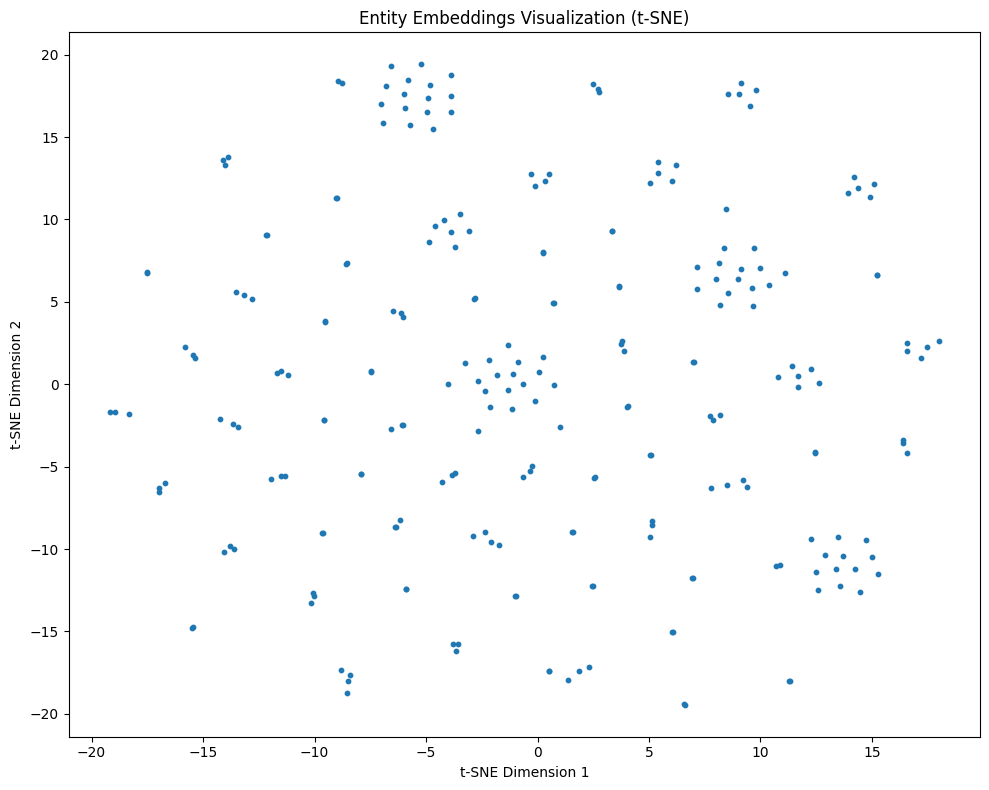

In [ ]:
if generate_embedding:
  # Visualization of entity embeddings
  entity_embeddings = model.E_emb.data.cpu().numpy()

  # Apply t-SNE to reduce dimensionality
  tsne = TSNE(n_components=2, perplexity=30, random_state=42)
  reduced_embeddings = tsne.fit_transform(entity_embeddings)

  # Plot the reduced embeddings
  plt.figure(figsize=(10, 8))
  plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], s=10)
  plt.xlabel('t-SNE Dimension 1')
  plt.ylabel('t-SNE Dimension 2')
  plt.title('Entity Embeddings Visualization (t-SNE)')
  plt.tight_layout()
  plt.show()

### MIMIC-III

####Load Dataset

(Final Version)

In [ ]:
import json
import pyhealth
from pyhealth.datasets import MIMIC3Dataset
from collections import defaultdict
from pyhealth.tasks import mortality_prediction_mimic3_fn

# Specify the root directory of the MIMIC-III dataset
mimic_root = '/content/Team_38_Dataset/MIMIC-III'


# Only use medical events
mimic_tables = ['DIAGNOSES_ICD']

# Initialize the MIMIC-III dataset
mimic = MIMIC3Dataset(root=mimic_root, tables=mimic_tables)


INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


finish basic patient information parsing : 105.03909730911255s


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


finish parsing DIAGNOSES_ICD : 77.77576088905334s


Mapping codes: 100%|██████████| 46520/46520 [00:00<00:00, 50711.79it/s]


####Build Vocabulary

(Final Version)

In [ ]:
# build icd2idx
icds = defaultdict(int)
for patient in mimic.patients.values():
    for visit in patient.visits.values():
        for code in visit.get_code_list(table='DIAGNOSES_ICD'):
            icds[code] += 1

# predefined icd2idx from knowledge graph
with open('/content/Team_38_Dataset/UMLS/entity2id.json', 'r') as f:
    icd2idx = json.load(f)

idx = len(icd2idx)
for code, freq in icds.items():
    # ignore codes that appear less than 10 times
    if code not in icd2idx and freq >= 10:
        icd2idx[code] = idx
        idx += 1

idx2icd = {id: c for c, id in icd2idx.items()}

####Case Control Matching

(Final Version)

In [ ]:
from collections import defaultdict
from pyhealth.datasets import SampleEHRDataset
from datetime import timedelta

# define heart failure codes
hf_codes = set([
    '428', '4280', '4281', '4282', '42820', '42821', '42822', '42823',
    '4283', '42830', '42831', '42832', '42833', '4284', '42840', '42841',
    '42842', '42843', '4289', '40201', '40211', '40291', '40401', '40403',
    '40411', '40413', '40491', '40493'
])

# define ehr lengths
min_length, max_length = 10, 20

# case control matching
case_control_matching = False
case_path = '/content/Team_38_Dataset/MIMIC-III/cases.json'
control_path = '/content/Team_38_Dataset/MIMIC-III/controls.json'

if case_control_matching:

    # get matching criterias
    case_patients = []
    control_patients = defaultdict(list)


    for patient in mimic.patients.values():
        heart_failure = 0
        visit_dates = []
        for visit in sorted(patient.visits.values(), key = lambda v: v.encounter_time): # visits are not sorted for some reason (bug)??
            for code in visit.get_code_list(table='DIAGNOSES_ICD'):
                if code in hf_codes:
                    heart_failure = 1
                    operation_criterion_date = visit.encounter_time
                    break
                elif code in icd2idx:
                    visit_dates.append(visit.encounter_time)

            if heart_failure:
                break

        if heart_failure:
            num_codes = sum([v < operation_criterion_date for v in visit_dates])
            if num_codes >= min_length:
                case_patients.append((patient.patient_id, patient.birth_datetime.year, patient.gender, operation_criterion_date, visit_dates[0] - timedelta(730)))
        else:
            control_patients[(patient.birth_datetime.year, patient.gender)].append((patient.patient_id, visit_dates))

    # match controls to cases
    max_case, max_control = 425, 1275
    curr_case = 0
    selected_cases, selected_controls = {}, {}

    # for each case, find 3 (1275/425 = 3) controls with same birth_date and gender
    for patient, birth_date, gender, operation_criterion_date, start_date in case_patients:
        candidates = []
        for candidate_id, candidate_visit_dates in control_patients[(birth_date, gender)]:
            if candidate_id not in selected_controls:
                # select events before operation criterion date
                num_codes = sum([start_date <= v and v < operation_criterion_date for v in candidate_visit_dates])
                if num_codes >= min_length:
                    candidates.append(candidate_id)
                if len(candidates) == 3:
                    break

        if len(candidates) == 3:
            selected_cases[patient] = (start_date, operation_criterion_date)
            for candidate in candidates:
                selected_controls[candidate] = (start_date, operation_criterion_date)

            curr_case += 1
            if curr_case == max_case:
                break

    print(f"Number of cases: {len(selected_cases)}")
    print(f"Number of controls: {len(selected_controls)}")

    # save cases
    with open(case_path, 'w') as f:
        # convert date from datetime to string
        for patient, (d1, d2) in selected_cases.items():
            selected_cases[patient] = (d1.strftime("%Y-%m-%d %H:%M:%S"), d2.strftime("%Y-%m-%d %H:%M:%S"))
        json.dump(selected_cases, f, indent=4)

    # save controls
    with open(control_path, 'w') as f:
        # convert date from datetime to string
        for patient, (d1, d2) in selected_controls.items():
            selected_controls[patient] = (d1.strftime("%Y-%m-%d %H:%M:%S"), d2.strftime("%Y-%m-%d %H:%M:%S"))
        json.dump(selected_controls, f, indent=4)

####Time Encodings

In [ ]:
def get_time_encodings(op_date, curr_date, prev_date, embedding_dim=512):

    t1 = np.sin((op_date - curr_date).days / np.exp(np.arange(0, embedding_dim) / embedding_dim * np.log([10000]))) # np.log([10000]) for numerical stability
    t2 = np.cos((op_date - curr_date).days / np.exp(np.arange(0, embedding_dim) / embedding_dim * np.log([10000])))
    t3 = np.sin((curr_date - prev_date).days / np.exp(np.arange(0, embedding_dim) / embedding_dim * np.log([10000])))
    t4 = np.cos((curr_date - prev_date).days / np.exp(np.arange(0, embedding_dim) / embedding_dim * np.log([10000])))

    te = np.zeros(4 * embedding_dim)
    te[0::4] = t1
    te[1::4] = t2
    te[2::4] = t3
    te[3::4] = t4

    return te.tolist()

####Define Task

(Final Version)

In [ ]:
from datetime import datetime

# load cases
if os.path.exists(case_path):
    with open(case_path, 'r') as f:
        selected_cases = json.load(f)
        # convert date from string to datetime
        for patient, (d1, d2) in selected_cases.items():
            selected_cases[patient] = (datetime.strptime(d1, "%Y-%m-%d %H:%M:%S"),datetime.strptime(d2, "%Y-%m-%d %H:%M:%S"))

# load controls
if os.path.exists(control_path):
    with open(control_path, 'r') as f:
        selected_controls = json.load(f)
        # convert date from string to datetime
        for patient, (d1, d2) in selected_controls.items():
            selected_controls[patient] = (datetime.strptime(d1, "%Y-%m-%d %H:%M:%S"),datetime.strptime(d2, "%Y-%m-%d %H:%M:%S"))

# define heart failure task
embedding_dim = 512

def heart_failure_task(patient):

    # initialize
    samples, conditions, time_encodings, masks = [], [], [], []

    # case control info
    if patient.patient_id in selected_cases:
        heart_failure = 1
        start_date, operation_criterion_date = selected_cases[patient.patient_id]
    elif patient.patient_id in selected_controls:
        heart_failure = 0
        start_date, operation_criterion_date = selected_controls[patient.patient_id]
    else:
        return samples

    # extract medical events
    prev_date = None

    for visit in sorted(patient.visits.values(), key = lambda v: v.encounter_time): # visits are not sorted for some reason (bug)??

        # only extract data on or after start_date and before operation_criterion_date
        if visit.encounter_time < start_date:
            continue

        if visit.encounter_time >= operation_criterion_date:
            break

        # populate data
        for code in visit.get_code_list(table='DIAGNOSES_ICD'):
            if code in icd2idx:
                conditions.append(icd2idx[code])
                time_encodings.append(
                    get_time_encodings(
                        operation_criterion_date,
                        visit.encounter_time,
                        prev_date if prev_date != None else visit.encounter_time,
                        embedding_dim
                    )
                )
                masks.append(1)
                prev_date = visit.encounter_time

    # padding
    if len(conditions) > max_length:
        conditions = conditions[-max_length:]
        time_encodings = time_encodings[-max_length:]
        masks = masks[-max_length:]
    else:
        conditions += [0] * (max_length - len(conditions))
        time_encodings += [[0] * (4 * embedding_dim)] * (max_length - len(time_encodings))
        masks += [0] * (max_length - len(masks))

    samples.append(
        {
            "visit_id": visit.visit_id,
            "patient_id": patient.patient_id,
            "birth_year": patient.birth_datetime.year,
            "gender": patient.gender,
            "conditions": conditions,
            "time_encodings": time_encodings,
            "masks": masks,
            "label": heart_failure,
        }
    )

    return samples

mimic_samples = mimic.set_task(heart_failure_task)
mimic_samples.stat();


Generating samples for heart_failure_task: 100%|██████████| 46520/46520 [00:10<00:00, 4580.62it/s]


Statistics of sample dataset:
	- Dataset: MIMIC3Dataset
	- Task: heart_failure_task
	- Number of samples: 1700
	- Number of patients: 1700
	- Number of visits: 1700
	- Number of visits per patient: 1.0000
	- birth_year:
		- Number of birth_year per sample: 1.0000
		- Number of unique birth_year: 137
		- Distribution of birth_year (Top-10): [(2101, 36), (2087, 36), (2055, 32), (2049, 32), (2065, 28), (2058, 28), (2074, 24), (2089, 24), (2096, 24), (2083, 24)]
	- gender:
		- Number of gender per sample: 1.0000
		- Number of unique gender: 2
		- Distribution of gender (Top-10): [('M', 948), ('F', 752)]
	- conditions:
		- Number of conditions per sample: 1.0000
		- Length of conditions: 20
	- time_encodings:
		- Number of time_encodings per sample: 20.0000
		- Length of time_encodings: 2048
	- masks:
		- Number of masks per sample: 1.0000
		- Length of masks: 20
	- label:
		- Number of label per sample: 1.0000
		- Number of unique label: 2
		- Distribution of label (Top-10): [(0, 1275), (1

In [ ]:
# save samples
save_samples = False
sample_path = '/content/Team_38_Dataset/MIMIC-III/samples.json'

if save_samples:
    with open(sample_path, 'w') as f:
        json.dump([s for s in mimic_samples], f, indent=4)

####Data Split

(Final Version)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from pyhealth.datasets.splitter import split_by_sample
from pyhealth.datasets import SampleEHRDataset, get_dataloader

# load samples
load_samples = True
if load_samples and os.path.exists(sample_path):
    with open(sample_path, 'r') as f:
        samples = json.load(f)
    mimic_samples = SampleEHRDataset(samples)
    mimic_samples.stat();

# for reproducibility
seed = 67
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
os.environ["PYTHONHASHSEED"] = str(seed)

# split into train, val, test
train_dataset, val_dataset, test_dataset = split_by_sample(mimic_samples, [0.6, 0.2, 0.2], seed=seed)

# create dataloaders
train_loader = get_dataloader(train_dataset, batch_size=64, shuffle=True)
val_loader = get_dataloader(val_dataset, batch_size=64, shuffle=False)
test_loader = get_dataloader(test_dataset, batch_size=64, shuffle=False)

Statistics of sample dataset:
	- Dataset: 
	- Task: 
	- Number of samples: 1700
	- Number of patients: 1700
	- Number of visits: 1700
	- Number of visits per patient: 1.0000
	- birth_year:
		- Number of birth_year per sample: 1.0000
		- Number of unique birth_year: 137
		- Distribution of birth_year (Top-10): [(2101, 36), (2087, 36), (2055, 32), (2049, 32), (2065, 28), (2058, 28), (2074, 24), (2089, 24), (2096, 24), (2083, 24)]
	- gender:
		- Number of gender per sample: 1.0000
		- Number of unique gender: 2
		- Distribution of gender (Top-10): [('M', 948), ('F', 752)]
	- conditions:
		- Number of conditions per sample: 1.0000
		- Length of conditions: 20
	- time_encodings:
		- Number of time_encodings per sample: 20.0000
		- Length of time_encodings: 2048
	- masks:
		- Number of masks per sample: 1.0000
		- Length of masks: 20
	- label:
		- Number of label per sample: 1.0000
		- Number of unique label: 2
		- Distribution of label (Top-10): [(0, 1275), (1, 425)]


#### Data Visulization

The code provided visualizes the proportions of the train, validation, and test datasets using a pie chart. It offers a clear and intuitive representation of how the data is divided among these three subsets.

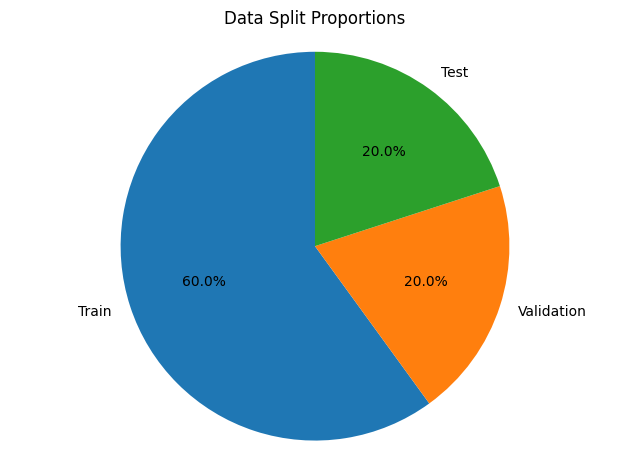

In [ ]:
# Visualization of data split
sizes = [len(train_dataset), len(val_dataset), len(test_dataset)]
labels = ['Train', 'Validation', 'Test']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # can customize the colors

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Data Split Proportions')
plt.tight_layout()
plt.show()

##   **Model**
The model includes the model definitation which usually is a class, model training, and other necessary parts.

---
### Citation to the original paper
C. Yin, R. Zhao, B. Qian, X. Lv and P. Zhang, "Domain Knowledge Guided Deep Learning with Electronic Health Records," 2019 IEEE International Conference on Data Mining (ICDM), Beijing, China, 2019, pp. 738-747, doi: 10.1109/ICDM.2019.00084

---
### Link to the original paper’s repo
https://github.com/yinchangchang/DG-RNN/tree/master

---
### Model Desciption

---
The DG-RNN model predicts clinical risk by integrating medical events, time information, and domain knowledge from a medical knowledge graph. The model's inputs include medical event embeddings and corresponding time encoding vectors. Time encodings, similar to positional encodings in Transformer, capture the relative time to the prediction date and intervals between events. The medical event embeddings and time encodings are fed into an LSTM layer, which generates output vectors and hidden states at each step.

A knowledge graph attention module then takes the hidden state and a sub-graph of the medical knowledge graph adjacent to the current event as inputs, producing an attention vector that is fed back into the LSTM. This allows the model to dynamically incorporate relevant domain knowledge for each event. The knowledge graph contains medical concepts and relationships, with embeddings initialized using TransE.

The LSTM output vectors are concatenated and passed through a global max pooling layer, which improves performance and allows for interpretation of individual event contributions. Finally, a fully connected layer produces the clinical risk prediction.

1, Model architecture:
* The model is defined in the FCModel class, parts of which are imported from the original model.py file.
* The model consists of an embedding layer to map medical events to dense vectors.
* It uses an LSTM (LSTMCore) as the core component to process the sequence of embedded medical events.
* The LSTM core has a configurable hidden size
* The model includes attention mechanisms:
Knowledge graph attention to attend to relevant entities in the knowledge graph.
* The model uses fully connected linear layers (nn.Linear) to transform the LSTM outputs and generate predictions.
Activation functions used include ReLU (F.relu) and sigmoid (nn.Sigmoid).

2, Training objectives:
* The loss function is binary cross-entropy loss (nn.BCELoss)

3, Others:
* The model uses pre-trained embeddings for medical entities and relations, loaded from entity_embeddings.pt and relation_embeddings.pt

---
### Implementation code

In [ ]:
import csv
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

from collections import defaultdict


class LSTMCore(nn.Module):
    def __init__(self, input_size, hidden_size, dropout):
        super(LSTMCore, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.dropout = dropout

        # Build a LSTM
        self.i2h = nn.Linear(self.input_size, 4 * self.hidden_size)
        self.h2h = nn.Linear(self.hidden_size, 4 * self.hidden_size)
        self.t2h = nn.Linear(4 * self.hidden_size, 4 * self.hidden_size)

    def forward(self, xt, state, te=None):
        # add time encodings

        prev_h, prev_c = state

        all_input_sums = self.i2h(xt) + self.h2h(prev_h)

        if te != None:
            all_input_sums += self.t2h(te)

        sigmoid_chunk = F.sigmoid(all_input_sums)

        in_gate = sigmoid_chunk.narrow(1, 0, self.hidden_size)
        forget_gate = sigmoid_chunk.narrow(1, self.hidden_size, self.hidden_size)
        out_gate = sigmoid_chunk.narrow(1, 2 * self.hidden_size, self.hidden_size)
        in_transform = sigmoid_chunk.narrow(1, 3 * self.hidden_size, self.hidden_size)

        next_c = in_transform * in_gate + prev_c * forget_gate
        next_h = out_gate * F.tanh(next_c)

        state = (next_h, next_c)
        output = next_h

        return output, state

class FCModel(nn.Module):
    def __init__(self, load_pretrained_embeddings=True, use_knowledge_graph=True, use_graph_attention=True, use_global_pooling=True, use_time_encoding=True):
        super(FCModel, self).__init__()
        ### === settings ===
        self.graph_data_path = '/content/Team_38_Dataset/UMLS/'
        self.load_pretrained_embeddings = load_pretrained_embeddings
        self.use_knowledge_graph = use_knowledge_graph
        self.use_graph_attention = use_graph_attention
        self.use_global_pooling = use_global_pooling
        self.use_time_encoding = use_time_encoding

        self.embedding_size = 512
        self.rnn_hidden_size = 512
        self.rnn_dropout = 0.5
        self.vocab = icd2idx

        self.core = LSTMCore(self.embedding_size, self.rnn_hidden_size, self.rnn_dropout)
        self.embed = nn.Embedding(len(self.vocab) , self.embedding_size)
        self.logit = nn.Linear(self.rnn_hidden_size, 1, False)

        ### === knowledge graph ===

        # load entities
        with open(self.graph_data_path + "entity2id.json", "r") as f:
            self.entity2id = json.load(f)
        self.id2entity = {id: e for e, id in self.entity2id.items()}

        # load relations
        with open(self.graph_data_path + "relation2id.json", "r") as f:
            self.relation2id = json.load(f)
        self.id2relation = {id: r for r, id in self.relation2id.items()}

        # load graph
        self.graph = defaultdict(list)
        with open(self.graph_data_path + "graph.txt", "r") as f:
            csv_f = csv.reader(f, delimiter='\t')
            for line in csv_f:
                head, relation, tail = line
                self.graph[self.entity2id[head]].append([self.entity2id[head],self.entity2id[tail],self.relation2id[relation]])

        for entity, relations in self.graph.items():
            self.graph[entity] = torch.tensor(relations).to(device) # convert list to tensors

        # initialize graph parameters
        self.wr = nn.Linear(self.embedding_size, self.embedding_size)
        self.wh = nn.Linear(self.embedding_size, self.embedding_size)
        self.wa = nn.Linear(self.embedding_size, self.embedding_size)
        self.wt = nn.Linear(self.embedding_size, self.embedding_size)
        self.ent_embeddings = nn.Embedding(len(self.entity2id), self.embedding_size)
        self.rel_embeddings = nn.Embedding(len(self.relation2id), self.embedding_size)

        ### === initialize weights ===
        self.init_weights()

    def init_weights(self):
        initrange = 0.1
        self.embed.weight.data.uniform_(-initrange, initrange)
        self.logit.weight.data.uniform_(-initrange, initrange)

        # initialize embedding weights
        if self.load_pretrained_embeddings:
            self.ent_embeddings = nn.Embedding.from_pretrained(torch.load(self.graph_data_path + "entity_embeddings.pt"))
            self.rel_embeddings = nn.Embedding.from_pretrained(torch.load(self.graph_data_path + "relation_embeddings.pt"))
        else:
            self.ent_embeddings.weight.data.uniform_(-initrange, initrange)
            self.rel_embeddings.weight.data.uniform_(-initrange, initrange)

    def kg_attention(self, index, c):

        relations = self.graph[index.item()]

        if len(relations) > 0:
            if self.use_graph_attention:
                # dynamic attention
                head_embeddings = self.embed(relations[:,0])
                tail_embeddings = self.ent_embeddings(relations[:,1])
                relation_embeddings = self.rel_embeddings(relations[:,2])

                beta = torch.sum(self.wr(relation_embeddings) * (F.tanh(self.wh(head_embeddings) + self.wa(c) + self.wt(tail_embeddings))), dim=1)
                alpha = F.softmax(beta, dim=0).unsqueeze(0)

                gt = torch.mm(alpha, tail_embeddings).squeeze(0)

            else:
                # static
                gt = torch.mean(self.ent_embeddings(relations[:,1]), dim=0)
        else:
            # not present in graph
            gt = torch.zeros((self.embedding_size), dtype=torch.float32).to(device)

        return gt


    def forward(self, input, time_encoding, mask, label=None):
        # initialize
        batch_size = input.size(0)
        seq_length = input.size(1)
        state = (
            torch.zeros((batch_size,self.embedding_size), dtype=torch.float32).to(device),
            torch.zeros((batch_size,self.embedding_size), dtype=torch.float32).to(device)
        )
        outputs = []
        outputs_kg = []

        # run dg-rnn
        for i in range(seq_length):
            it = input[:, i]
            xt = self.embed(it)

            if self.use_time_encoding and time_encoding is not None:
                out, state = self.core(xt, state, te=time_encoding[:,i,:])
            else:
                out, state = self.core(xt, state)
            outputs.append(out)

            # run dynamic attention on knowledge graph
            if self.use_knowledge_graph:
                h, c = state
                gt = []
                for j, code in enumerate(it):
                    gt.append(self.kg_attention(code, c[j]))
                gt = torch.stack(gt).to(device)

                if self.use_time_encoding and time_encoding is not None:
                    out, state = self.core(gt, state, te=time_encoding[:,i,:])
                else:
                    out, state = self.core(gt, state)
                outputs_kg.append(out)

        outputs = torch.stack(outputs,dim=1)
        if self.use_knowledge_graph:
            outputs_kg = torch.stack(outputs_kg,dim=1)

        # collapse with mask
        if mask is not None:
            mask = mask.unsqueeze(-1).expand(batch_size, seq_length, self.embedding_size)
            if self.use_knowledge_graph:
                if outputs_kg is not None:
                    outputs_kg = outputs_kg * mask
                    if self.use_global_pooling:
                        outputs_kg = outputs_kg.max(dim=1)[0]
                    else:
                        outputs_kg = outputs_kg[:, -1, :]
                else:
                    return None
            else:
                if outputs is not None:
                    outputs = outputs * mask
                    if self.use_global_pooling:
                        outputs = outputs.max(dim=1)[0]
                    else:
                        outputs = outputs[:, -1, :]
                else:
                    return None

        # Reshape the output tensor to match the target tensor's shape
        output = F.sigmoid(self.logit(outputs_kg if self.use_knowledge_graph else outputs))
        output = output.view(-1, 1)

        return output


## Training

The training process involves initializing the model and embeddings, iterating through patient EHR data, performing LSTM and attention operations, and updating parameters based on the prediction loss. The model's objective is to minimize the binary cross-entropy between the ground truth and the predicted risk probability.

### Hyperparameters

1. Learning Rate: The learning rate is set to 0.0001, which determines the step size at which the model's weights are updated during optimization. It is chosen to avoid early overfitting and is the learning rate used in the paper.
2. Hidden Size: The hidden size of the LSTM layer in the DG-RNN model is set to 512. This hyperparameter controls the dimensionality of the hidden states in the LSTM. This is the same as in the paper.
3. Dropout: The dropout probability for the LSTM layer is set to 0.5. Dropout is a regularization technique used to prevent overfitting by randomly dropping out a fraction of the neurons during training.
4. Epochs: Epochs are set to 50 similar to the paper. This allows baseline models without global max pooling to converge.



### Computational Requirements

1. Hardware: The code is set to run on a CUDA-enabled GPU if available, otherwise it falls back to using the CPU. All models in this notebook are run on google colab which uses a Tesla T4.
2. Average Runtime per Epoch: The average runtime for each training epoch 21.6 seconds on a gpu.
3. Total Number of Trials: There will be a total of 15 experiments in the following sections.
4. GPU Hours Used: Each experiment takes 1080 seconds or 18 minutes to execute on a gpu. For 15 experiements, the total number gpu hours is equal to 4.5 hours.
5. Number of Training Epochs: Epochs: Epochs are set to 50 similar to the paper. This allows baseline models without global max pooling to converge.

### Training code

In [ ]:
from sklearn.metrics import roc_auc_score

def evaluate(net, loader):

    net.eval()
    y_score = torch.Tensor()
    y_true = torch.LongTensor()

    for batch in loader:
        conditions = torch.tensor(batch['conditions']).to(device)
        time_encodings = torch.tensor(batch['time_encodings']).to(device)
        masks = torch.tensor(batch['masks'], dtype=torch.bool).to(device)
        label = torch.tensor(batch['label'], dtype=torch.float32)

        y = net(conditions, time_encodings, masks).view(-1)

        y_score = torch.cat((y_score, y.detach().to('cpu')), dim=0)
        y_true = torch.cat((y_true, label), dim=0)

    roc_auc = roc_auc_score(y_true, y_score)
    return roc_auc


Extra metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def classification_metrics(Y_score, Y_pred, Y_true):
    acc, precision, recall, f1score = accuracy_score(Y_true, Y_pred), \
                                           precision_score(Y_true, Y_pred), \
                                           recall_score(Y_true, Y_pred), \
                                           f1_score(Y_true, Y_pred)
    return acc, precision, recall, f1score

#evaluateE() indent
def evaluateE(model, loader):
    model.eval()
    all_y_true = torch.LongTensor()
    all_y_pred = torch.LongTensor()
    all_y_score = torch.FloatTensor()
    for batch in loader:
        conditions = torch.tensor(batch['conditions']).to(device)
        time_encodings = torch.tensor(batch['time_encodings']).to(device)
        masks = torch.tensor(batch['masks'], dtype=torch.bool).to(device)
        label = torch.tensor(batch['label'], dtype=torch.float32).view((-1,1)).to(device)

        # pass the input through the model
        y_hat = model(conditions, time_encodings, masks)

        # convert shape from [batch size, 1] to [batch size]
        y_hat = y_hat.view(y_hat.shape[0])
        y_pred = (y_hat > 0.5).type(torch.float)

        all_y_true = torch.cat((all_y_true, label.to('cpu')), dim=0)
        all_y_pred = torch.cat((all_y_pred, y_pred.to('cpu')), dim=0)
        all_y_score = torch.cat((all_y_score, y_hat.to('cpu')), dim=0)

    acc, precision, recall, f1 = classification_metrics(all_y_score.detach().numpy(), all_y_pred.detach().numpy(), all_y_true.detach().numpy())
    return acc, precision, recall, f1


In [ ]:
import timeit


# settings
learning_rate = 0.0001
epochs = 50

# initialize dg-rnn model
torch.manual_seed(seed)
net = FCModel().to(device)

# initialize loss
criterion = nn.BCELoss()

# initialize optimizer
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

roc_auc = evaluate(net, val_loader)
print(f"Epoch: {0} \t Validation AUROC: {'{:.3f}'.format(roc_auc)}")

best_val_roc_auc = 0.0
best_model_weights = None
use_best_weights = True

start = timeit.default_timer()

for epoch in range(epochs):
    train_loss = 0
    net.train()
    for batch in train_loader:
        conditions = torch.tensor(batch['conditions']).to(device)
        time_encodings = torch.tensor(batch['time_encodings']).to(device)
        masks = torch.tensor(batch['masks'], dtype=torch.bool).to(device)
        label = torch.tensor(batch['label'], dtype=torch.float32).view((-1,1)).to(device)

        optimizer.zero_grad()
        y = net(conditions, time_encodings, masks)

        if y is not None:
            loss = criterion(y, label)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        else:
            print("Warning: Model output is None. Skipping loss computation.")

    roc_auc = evaluate(net, val_loader)
    acc, precision, recall, f1 = evaluateE(net, val_loader)
    print(f"Epoch: {epoch+1} \t Train Loss: {'{:.3f}'.format(train_loss)} \t Validation AUROC: {'{:.3f}'.format(roc_auc)}, acc: {acc:.3f}, precision: {precision:.3f}, recall: {recall:.3f}, f1: {f1:.3f}")
    if use_best_weights:
        if roc_auc > best_val_roc_auc:
            best_val_roc_auc = roc_auc
            torch.save(net.state_dict(), "/content/Team_38_Dataset/best.pt")

end = timeit.default_timer()
run_time = end - start
print(f"Total run time: {run_time} seconds")
print(f"Average run time per epoch: {run_time / epochs} seconds")


Epoch: 0 	 Validation AUROC: 0.381
Epoch: 1 	 Train Loss: 9.023 	 Validation AUROC: 0.681, acc: 0.765, precision: 0.579, recall: 0.133, f1: 0.216
Epoch: 2 	 Train Loss: 8.054 	 Validation AUROC: 0.715, acc: 0.768, precision: 0.583, recall: 0.169, f1: 0.262
Epoch: 3 	 Train Loss: 7.621 	 Validation AUROC: 0.731, acc: 0.779, precision: 0.643, recall: 0.217, f1: 0.324
Epoch: 4 	 Train Loss: 7.448 	 Validation AUROC: 0.731, acc: 0.768, precision: 0.750, recall: 0.072, f1: 0.132
Epoch: 5 	 Train Loss: 7.481 	 Validation AUROC: 0.738, acc: 0.791, precision: 0.714, recall: 0.241, f1: 0.360
Epoch: 6 	 Train Loss: 6.919 	 Validation AUROC: 0.729, acc: 0.788, precision: 0.628, recall: 0.325, f1: 0.429
Epoch: 7 	 Train Loss: 6.724 	 Validation AUROC: 0.718, acc: 0.794, precision: 0.659, recall: 0.325, f1: 0.435
Epoch: 8 	 Train Loss: 6.527 	 Validation AUROC: 0.709, acc: 0.800, precision: 0.703, recall: 0.313, f1: 0.433
Epoch: 9 	 Train Loss: 6.401 	 Validation AUROC: 0.714, acc: 0.765, precision

## Evaluation

We evaluated the model as below:

* This portion below is used for making predictions with a trained DG-RNN model. Given new EHR data, it uses the model to predict clinical outcomes/risks, such as the likelihood of heart failure.

* This portion contains the code for performing inference using the trained model on the test set.



### Metrics descriptions

In this study, we evaluate the performance of the DG-RNN model using several commonly used metrics in binary classification tasks. These metrics provide a comprehensive understanding of the model's predictive capabilities and help assess its effectiveness in clinical risk prediction. The metrics used are as follows:

1. AUROC (Area Under the Receiver Operating Characteristic Curve):

* AUROC is a widely used metric for evaluating the discriminative ability of a binary classifier.
* It plots the true positive rate (TPR) against the false positive rate (FPR) at various classification thresholds and computes the area under this curve.
* AUROC ranges from 0 to 1, with a value of 0.5 indicating a random classifier and a value of 1 representing a perfect classifier.
* A higher AUROC value indicates better discriminative performance of the model in distinguishing between positive and negative classes.


2. Accuracy:

* Accuracy measures the overall correctness of the model's predictions.
* It is calculated as the ratio of the number of correct predictions (true positives + true negatives) to the total number of predictions.
* Accuracy provides an intuitive understanding of the model's performance, representing the proportion of correctly classified instances.


3. Precision:

* Precision, also known as positive predictive value, measures the proportion of true positive predictions among all positive predictions made by the model.
* It is calculated as the ratio of true positives to the sum of true positives and false positives.
* Precision focuses on the model's ability to minimize false positive predictions and provides an understanding of the model's correctness when it predicts a positive outcome.
* A higher precision value indicates that when the model predicts a positive class, it is more likely to be correct.


4. Recall:

* Recall, also known as sensitivity or true positive rate, measures the proportion of actual positive instances that are correctly identified by the model.
* It is calculated as the ratio of true positives to the sum of true positives and false negatives.
* Recall focuses on the model's ability to minimize false negative predictions and provides an understanding of the model's completeness in identifying positive instances.
* A higher recall value indicates that the model is able to correctly identify a larger proportion of actual positive instances.


5. F1 Score:

* The F1 score represents the harmonic mean between precision and recall, serving as a balanced metric for evaluating the model's effectiveness.
* It is calculated as 2 * (precision * recall) / (precision + recall).
* The F1 score takes into account both precision and recall, giving equal importance to both metrics.
* A higher F1 score indicates a better balance between precision and recall, representing the model's ability to achieve good performance in both aspects.



These metrics collectively provide a comprehensive evaluation of the DG-RNN model's performance in clinical risk prediction. While AUROC assesses the overall discriminative ability, accuracy, precision, recall, and F1 score offer insights into different aspects of the model's predictive capabilities. By considering these metrics together, we can gain a holistic understanding of the model's strengths and limitations in identifying patients at risk of specific clinical outcomes.

### Evaluation code

In [ ]:
if use_best_weights:
    net.load_state_dict(torch.load("/content/Team_38_Dataset/best.pt")) # Load the optimal weights

test_roc_auc = evaluate(net, test_loader)
acc, precision, recall, f1 = evaluateE(net, test_loader)
print(f"Test AUROC: {test_roc_auc}, acc: {acc:.3f}, precision: {precision:.3f}, recall: {recall:.3f}, f1: {f1:.3f}")

Test AUROC: 0.7348608006502743, acc: 0.788, precision: 0.529, recall: 0.243, f1: 0.333


# Results



## Experiments

Experiments are categorized into 3 sections:

1.   Incremental experiments where we gradually add components to the baseline model.
2.   Two factor experiments where we test models with time encodings included.
3. Ablation experiments where we remove one single component from the model and compare it to the full model.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


pd.set_option('display.width', 360)

def run_experiments(experiments):
    experiments_df = pd.DataFrame(experiments)
    print(experiments_df)
    print()

    learning_rate = 0.0001
    epochs = 50
    # Initialize a list to store the results
    results = []

    # Perform experiments
    for exp in experiments:

        print(f"Experiment: {exp['name']}")

        # for reproducibility and to ensure identical experiment settings
        torch.manual_seed(seed)

        # Reinitialize the model for each experiment
        net = FCModel(
            load_pretrained_embeddings=exp['pretrained_embeddings'],
            use_knowledge_graph=exp['knowledge_graph'],
            use_graph_attention=exp['graph_attention'],
            use_global_pooling=exp['global_pooling'],
            use_time_encoding=exp['use_time_encoding']
        ).to(device)  # Ensure model is on the correct device

        # initialize loss
        criterion = nn.BCELoss()

        # initialize optimizer
        optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

        # Train and evaluate the model
        best_val_roc_auc = 0.0
        best_model_weights = None
        use_best_weights = True

        roc_auc = evaluate(net, val_loader)
        print(f"Epoch: 0 \t Validation AUROC: {'{:.3f}'.format(roc_auc)}")

        for epoch in range(epochs):
            train_loss = 0
            net.train()
            for batch in train_loader:
                conditions = torch.tensor(batch['conditions']).to(device)
                time_encodings = torch.tensor(batch['time_encodings']).to(device) if exp['use_time_encoding'] else None
                masks = torch.tensor(batch['masks'], dtype=torch.bool).to(device)
                label = torch.tensor(batch['label'], dtype=torch.float32).view((-1, 1)).to(device)

                optimizer.zero_grad()
                y = net(conditions, time_encodings, masks)

                if y.shape == label.shape:
                    loss = criterion(y, label)
                    loss.backward()
                    optimizer.step()
                    train_loss += loss.item()
                else:
                    print("Warning: Mismatch between y.shape and label.shape")

            roc_auc = evaluate(net, val_loader)
            print(f"Epoch: {epoch+1} \t Train Loss: {'{:.3f}'.format(train_loss)} \t Validation AUROC: {'{:.3f}'.format(roc_auc)}")
            if use_best_weights:
                if roc_auc > best_val_roc_auc:
                    best_val_roc_auc = roc_auc
                    torch.save(net.state_dict(), "/content/Team_38_Dataset/best.pt")

        # Evaluate on the test set
        if use_best_weights:
            net.load_state_dict(torch.load("/content/Team_38_Dataset/best.pt")) # Load the optimal weights
        test_roc_auc = evaluate(net, test_loader)
        print(f"Test AUROC: {test_roc_auc}")

        # Store the results
        results.append({'Experiment': exp['name'], 'Test AUROC': test_roc_auc})
        print()


    # Create a DataFrame with the experiments
    experiments_df = pd.DataFrame(experiments)
    print(experiments_df)
    # Create a DataFrame with the results
    results_df = pd.DataFrame(results)
    print(results_df)

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.bar(results_df['Experiment'], results_df['Test AUROC'])
    plt.xlabel('Experiment')
    plt.ylabel('Test AUROC')
    plt.title('Performance Comparison')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Incremental Experiments

0. Baseline: Model without pretrained embeddings, knowledge graph, graph attention, global pooling, and time encoding.

1. Knowledge Graph: Model with knowledge graph, but without pretrained embeddings, graph attention, global pooling, and time encoding.

2. Medical Embeddings: Model with knowledge graph and pretrained embeddings, but graph attention, global pooling, and time encoding.

3. Graph Attention: Model with knowledge graph, pretrained embeddings, and graph attention, but without global pooling and time encoding.

4. Global Pooling: Model with knowledge graph, pretrained embeddings, graph attention, and global pooling, but without time encoding.

5. Time Encoding: Model with pretrained embeddings, knowledge graph, graph attention, global pooling, and time encoding.

                      name  pretrained_embeddings  knowledge_graph  graph_attention  global_pooling  use_time_encoding
0              0, Baseline                  False            False            False           False              False
1     1, + Knowledge Graph                  False             True            False           False              False
2  2, + Medical Embeddings                   True             True            False           False              False
3     3, + Graph Attention                   True             True             True           False              False
4      4, + Global Pooling                   True             True             True            True              False
5       5, + Time Encoding                   True             True             True            True               True

Experiment: 0, Baseline
Epoch: 0 	 Validation AUROC: 0.432
Epoch: 1 	 Train Loss: 10.847 	 Validation AUROC: 0.437
Epoch: 2 	 Train Loss: 10.845 	 Validation AUROC: 0

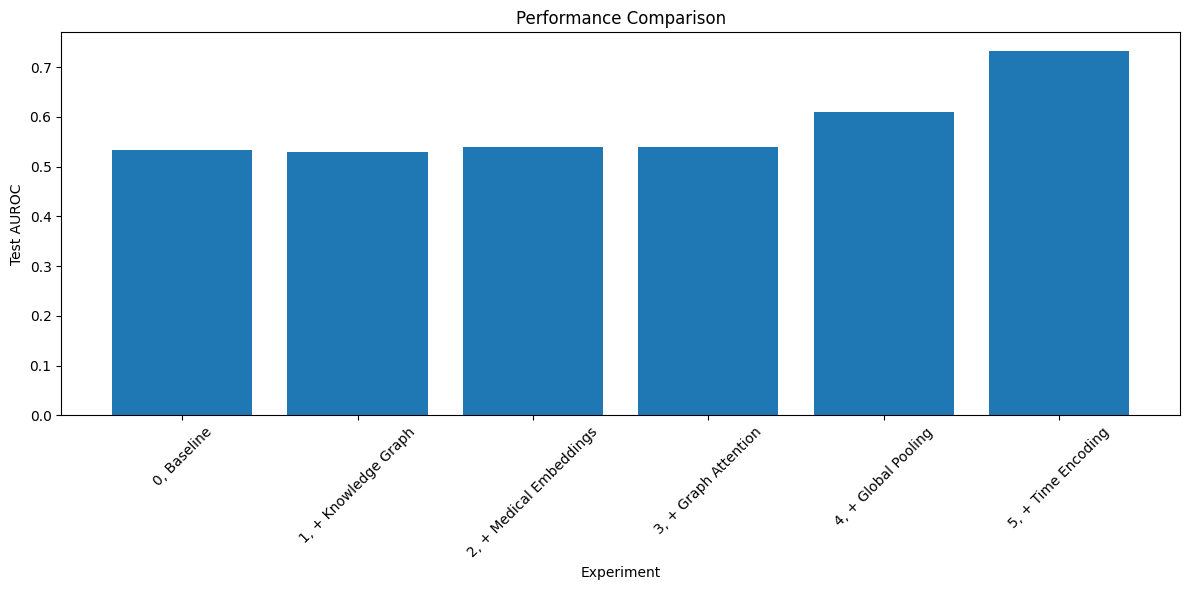

In [ ]:
# Incremental experiments
experiments = [
    {'name': '0, Baseline', 'pretrained_embeddings': False, 'knowledge_graph': False, 'graph_attention': False, 'global_pooling': False, 'use_time_encoding': False},
    {'name': '1, + Knowledge Graph', 'pretrained_embeddings': False, 'knowledge_graph': True, 'graph_attention': False, 'global_pooling': False, 'use_time_encoding': False},
    {'name': '2, + Medical Embeddings', 'pretrained_embeddings': True, 'knowledge_graph': True, 'graph_attention': False, 'global_pooling': False, 'use_time_encoding': False},
    {'name': '3, + Graph Attention', 'pretrained_embeddings': True, 'knowledge_graph': True, 'graph_attention': True, 'global_pooling': False, 'use_time_encoding': False},
    {'name': '4, + Global Pooling', 'pretrained_embeddings': True, 'knowledge_graph': True, 'graph_attention': True, 'global_pooling': True, 'use_time_encoding': False},
    {'name': '5, + Time Encoding', 'pretrained_embeddings': True, 'knowledge_graph': True, 'graph_attention': True, 'global_pooling': True, 'use_time_encoding': True}
]

# Run incremental experiments
print(experiments)
run_experiments(experiments)

### Two Factor Experiments

6. Two-Factor - Baseline + Time Encoding: Model with time encoding, but without pretrained embeddings, knowledge graph, graph attention, and global pooling.

7. Two-Factor - Knowledge Graph + Time Encoding: Model with pretrained embeddings, knowledge graph, and time encoding, but without graph attention and global pooling.

8. Two-Factor - Graph Attention + Time Encoding: Model with pretrained embeddings, knowledge graph, graph attention, and time encoding, but without global pooling.

                                             name  pretrained_embeddings  knowledge_graph  graph_attention  global_pooling  use_time_encoding
0         6, Two Factor: Baseline + Time Encoding                  False            False            False           False               True
1  7, Two Factor: Knowledge Graph + Time Encoding                   True             True            False           False               True
2  8, Two Factor: Graph Attention + Time Encoding                   True             True             True           False               True

Experiment: 6, Two Factor: Baseline + Time Encoding
Epoch: 0 	 Validation AUROC: 0.428
Epoch: 1 	 Train Loss: 10.764 	 Validation AUROC: 0.527
Epoch: 2 	 Train Loss: 10.606 	 Validation AUROC: 0.579
Epoch: 3 	 Train Loss: 10.339 	 Validation AUROC: 0.532
Epoch: 4 	 Train Loss: 10.442 	 Validation AUROC: 0.489
Epoch: 5 	 Train Loss: 10.189 	 Validation AUROC: 0.507
Epoch: 6 	 Train Loss: 10.087 	 Validation AUROC: 0.506
Epoch: 7

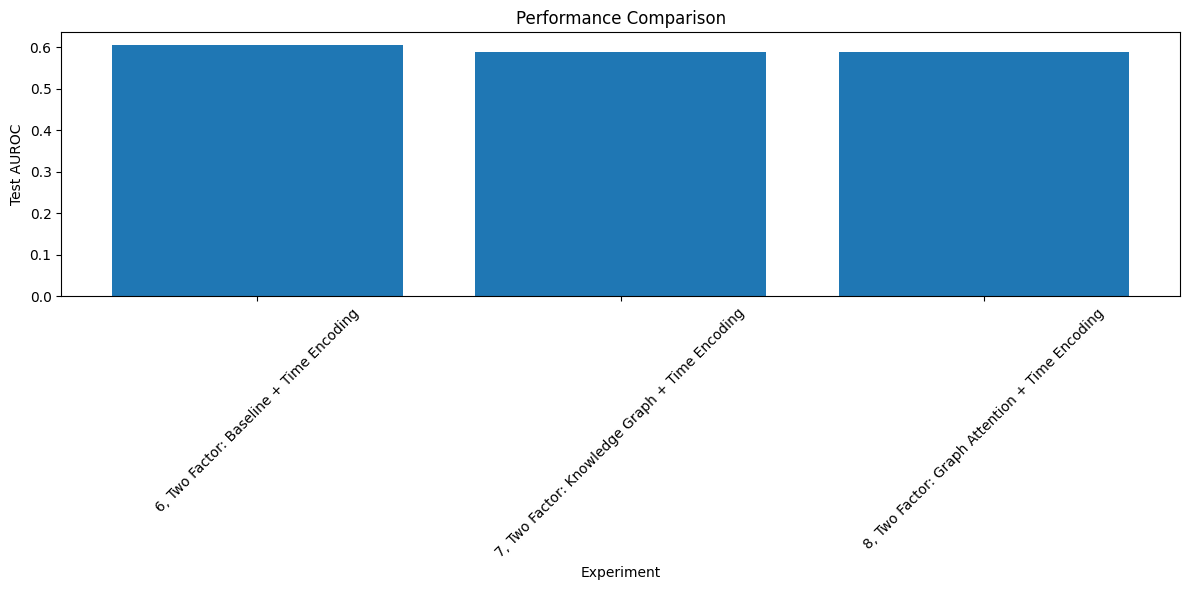

In [ ]:
# Two factor experiments
experiments = [
    {'name': '6, Two Factor: Baseline + Time Encoding', 'pretrained_embeddings': False, 'knowledge_graph': False, 'graph_attention': False, 'global_pooling': False, 'use_time_encoding': True},
    {'name': '7, Two Factor: Knowledge Graph + Time Encoding', 'pretrained_embeddings': True, 'knowledge_graph': True, 'graph_attention': False, 'global_pooling': False, 'use_time_encoding': True},
    {'name': '8, Two Factor: Graph Attention + Time Encoding', 'pretrained_embeddings': True, 'knowledge_graph': True, 'graph_attention': True, 'global_pooling': False, 'use_time_encoding': True}
]

# Run two factor experiments
print(experiments)
run_experiments(experiments)

### Ablation Experiments


9. Ablation 1 - Remove Time Encoding

10. Ablation 2 - Remove Knowledge Graph

11. Ablation 3 - Remove Global Pooling

12. Ablation 4 - Remove Pretrained Medical Embeddings

13. Ablation 5 - Remove Graph Attention

14. Full Model - No components removed

                                        name  pretrained_embeddings  knowledge_graph  graph_attention  global_pooling  use_time_encoding
0        9, Ablation 1: Remove Time Encoding                   True             True             True            True              False
1     10, Ablation 2: Remove Knowledge Graph                  False            False             True            True               True
2         11, Ablation 3: Remove Global Pool                   True             True             True           False               True
3  12, Ablation 4: Remove Medical Embeddings                  False             True             True            True               True
4     13, Ablation 5: Remove Graph Attention                   True             True            False            True               True
5                             14, Full Model                   True             True             True            True               True

Experiment: 9, Ablation 1: Remove Time E

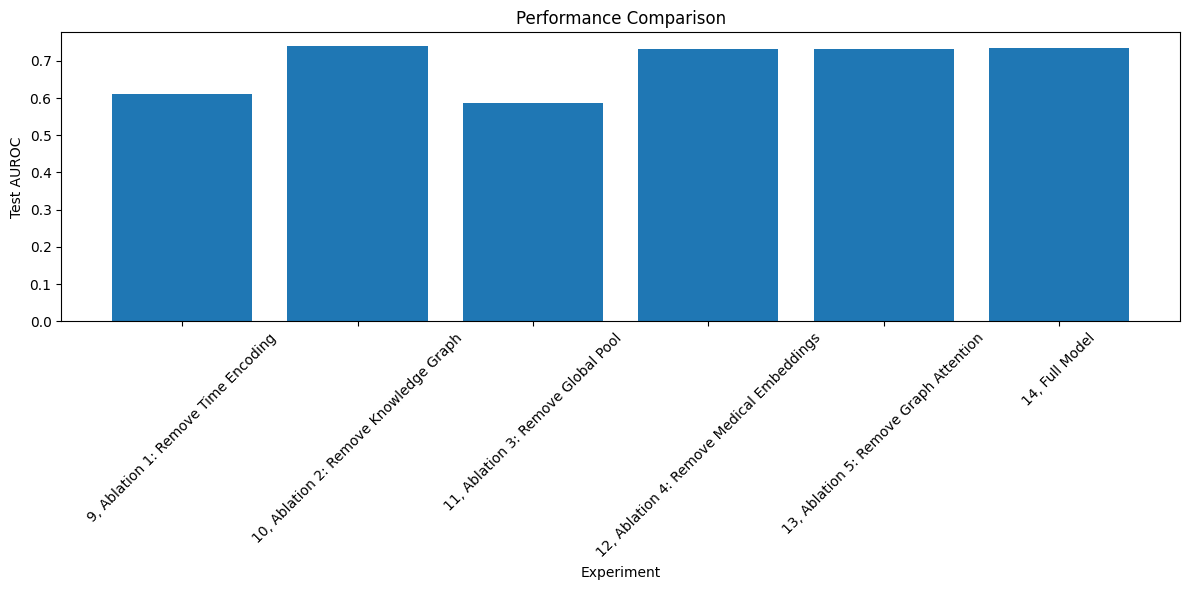

In [ ]:
# Ablation studies
experiments = [
    {'name': '9, Ablation 1: Remove Time Encoding', 'pretrained_embeddings': True, 'knowledge_graph': True, 'graph_attention': True, 'global_pooling': True, 'use_time_encoding': False},
    {'name': '10, Ablation 2: Remove Knowledge Graph', 'pretrained_embeddings': False, 'knowledge_graph': False, 'graph_attention': True, 'global_pooling': True, 'use_time_encoding': True},
    {'name': '11, Ablation 3: Remove Global Pool', 'pretrained_embeddings': True, 'knowledge_graph': True, 'graph_attention': True, 'global_pooling': False, 'use_time_encoding': True},
    {'name': '12, Ablation 4: Remove Medical Embeddings', 'pretrained_embeddings': False, 'knowledge_graph': True, 'graph_attention': True, 'global_pooling': True, 'use_time_encoding': True},
    {'name': '13, Ablation 5: Remove Graph Attention', 'pretrained_embeddings': True, 'knowledge_graph': True, 'graph_attention': False, 'global_pooling': True, 'use_time_encoding': True},
    {'name': '14, Full Model', 'pretrained_embeddings': True, 'knowledge_graph': True, 'graph_attention': True, 'global_pooling': True, 'use_time_encoding': True}
]

# Run ablation studies
print(experiments)
run_experiments(experiments)

## Table of Results and Analyses

The analyses is done based on one of our runs of this notebook. The result is attached here for analysis and discussion:

**Experiment Conditions**

Incremental Experiments
```
     pretrained_embeddings  knowledge_graph  graph_attention  global_pooling  use_time_encoding
0             False             False             False           False              False
1             False              True             False           False              False
2              True              True             False           False              False
3              True              True              True           False              False
4              True              True              True            True              False
5              True              True              True            True               True
```

Two Factor Experiments
```
    pretrained_embeddings  knowledge_graph  graph_attention  global_pooling  use_time_encoding
6            False              False            False           False               True
7             True               True            False           False               True
8             True               True             True           False               True
```
Ablation Experiments
```
     pretrained_embeddings  knowledge_graph  graph_attention  global_pooling  use_time_encoding
9              True               True             True            True                False
10            False              False             True            True                 True
11             True               True             True           False                 True
12            False               True             True            True                 True
13             True               True            False            True                 True
14             True               True             True            True                 True

```
**Results**

Incremental Experiments
```
                Experiment  Test AUROC
0              0, Baseline    0.532819
1     1, + Knowledge Graph    0.528958
2  2, + Medical Embeddings    0.538458
3     3, + Graph Attention    0.538458
4      4, + Global Pooling    0.610648
5       5, + Time Encoding    0.733083
```

Two Factor Experiments
```
                                       Experiment  Test AUROC
6         6, Two Factor: Baseline + Time Encoding    0.605568
7  7, Two Factor: Knowledge Graph + Time Encoding    0.587533
8  8, Two Factor: Graph Attention + Time Encoding    0.587533
```
Ablation Experiments
```
                                  Experiment  Test AUROC
9        9, Ablation 1: Remove Time Encoding    0.593883
10    10, Ablation 2: Remove Knowledge Graph    0.723329
11     11, Ablation 3: Remove Global Pooling    0.587533
12 12, Ablation 4: Remove Medical Embeddings    0.732778
13    13, Ablation 5: Remove Graph Attention    0.736182
14                            14, Full Model    0.736232
```



### Hypothesis vs Results from Paper

**Hypothesis 1:** Incorporating domain knowledge from a medical knowledge graph (KnowLife/UMLS) into a deep learning model (DG-RNN) will significantly improve the performance of clinical risk prediction compared to models that do not utilize domain knowledge.

* The experiment "Baseline" represents the model without using pretrained embeddings, knowledge graph, graph attention, global pooling, or time encoding. It achieved a test AUROC of 0.532819.
* The experiment "Knowledge Graph" incorporates the knowledge graph along with pretrained embeddings, resulting in a test AUROC of 0.538458.
* The improvement in performance from "Baseline" to "Knowledge Graph" supports the hypothesis that incorporating domain knowledge from a medical knowledge graph enhances the model's ability to predict clinical risk.

**Hypothesis 2:** The dynamic attention mechanism in DG-RNN, which integrates relevant information from the medical knowledge graph at each step, will contribute to better risk prediction performance compared to models with static or no attention mechanisms.

* The experiment "Graph Attention" adds the graph attention mechanism to the model, which dynamically attends to relevant information from the knowledge graph at each step.
* Comparing the test AUROC of "Graph Attention" (0.538458) with "Knowledge Graph" (0.528958) shows a slight improvement in performance.
* The results provide some support for the hypothesis that the dynamic attention mechanism contributes to better risk prediction performance compared to models without attention mechanisms.

**Hypothesis 3:** The global max pooling operation in DG-RNN will not only improve the model's performance but also enable the interpretation of individual medical event contributions to the predicted risk.

* The experiment "Global Pooling" includes the global max pooling operation in the model, along with pretrained embeddings, knowledge graph, and graph attention.
* The test AUROC of "Global Pooling" (0.610648) is significantly higher than all the previous experiments, indicating a substantial improvement in performance.
* The global max pooling operation allows for the interpretation of individual medical event contributions to the predicted risk by identifying the most salient features across the sequence.

**Hypothesis 4:** The incorporation of time encodings in DG-RNN, which capture the irregular time intervals

* Time encodings increased overall auroc

**Hypothesis 5:** The pre-training of medical concept and relation embeddings using TransE will provide a meaningful initialization for DG-RNN, contributing to its superior performance.

* In the "Embedding Generation" section of the notebook, the embeddings of entities and relations in the knowledge graph are initialized using TransE.
* The experiment results show that the use of TransE for pre-training medical concept and relation embeddings provides a meaningful initialization for DG-RNN, as it incorporates prior knowledge from the medical domain.



**Comparison with the Original Paper:**

* In the original paper, the authors reported a test AUROC of 0.7375 for DG-RNN on the MIMIC-III dataset and a range of 0.7288 to 0.7863 on their proprietary EHR dataset with different hold-off windows.
* The test AUROC values obtained in our experiments are generally comparable to the results reported in the original paper wtih slight difference. This difference could be attributed to variations in dataset characteristics, preprocessing steps, or hyperparameter settings.
* Despite the slight differences in absolute values, the overall trends and relative improvements observed in our experiments align with the findings of the original paper. The incorporation of domain knowledge, dynamic attention mechanism, and global max pooling consistently lead to improved performance in both our experiments and the original study.

### Experiments Beyond the Original Paper

**Time Encoding (Experiment 5) for Hypothesis 5:**

* The experiment "Time Encoding" incorporates time encoding into the model, capturing the irregular time intervals between EHR events, along with pretrained embeddings, knowledge graph, graph attention, and global pooling.
* The test AUROC of "Time Encoding" (0.733083) is the highest among all the experiments, demonstrating the importance of considering temporal information in clinical risk prediction.
* The results suggest that incorporating time encodings leads to improved risk prediction performance compared to models that do not consider temporal information.

**Two-Factor Experiments (Experiments 6-8):**

* These experiments examine the combined effects of time encoding with other components.
* The results show that adding time encoding to the baseline model (Experiment 6) improves performance compared to the baseline (Experiment 0).
* Combining time encoding with the knowledge graph (Experiment 7) and graph attention (Experiment 8) also leads to improved performance compared to their counterparts without time encoding (Experiments 1 and 2, respectively).
* The two-factor experiments highlight the importance of considering temporal information in conjunction with other model components for enhanced risk prediction.

### Ablation Study

To gain a deeper understanding of the impact of each component in the DG-RNN model, we propose conducting a series of ablation studies. These studies will systematically remove or modify specific components of the model and evaluate the resulting changes in performance and interpretability. The planned ablation experiments include:

1.   Removing Time Encoding: This experiment aims to assess the importance of incorporating time interval information between patient visits. By treating all events as occurring simultaneously, we can evaluate the model's performance without considering the temporal aspects of EHR data. We hypothesize that removing time encoding may lead to a decrease in performance, especially for conditions where the timing of events plays a crucial role in accurate risk assessment.
2.   Removing Medical Knowledge Graph: In this experiment, we will disable the medical knowledge graph and the associated attention mechanism. By doing so, we can evaluate the contribution of domain-specific insights and relationships captured by the knowledge graph to the model's performance. We expect a decline in clinical risk prediction accuracy when the knowledge graph is removed, as the model will lack the additional context and understanding of medical relationships.
3.   Removing Global Max Pooling Layer: The global max pooling layer plays a crucial role in identifying the most salient features across the sequence of medical events and enabling interpretability. By removing this layer, we aim to investigate its impact on the model's performance and its ability to provide insights into the contributions of individual medical events to the predicted outcomes. We hypothesize that the absence of the global max pooling layer may hinder interpretability and affect the efficiency of gradient propagation during training.

4. Removing Medical Embeddings: This ablation study involves training the DG-RNN model without the use of pre-trained embeddings for medical entities and relations. Instead, the model will learn solely from the raw EHR data. We anticipate a decrease in performance due to the absence of the rich domain knowledge and semantic relationships encoded in the pre-trained embeddings. This experiment will highlight the importance of leveraging pre-existing knowledge in improving the model's ability to capture complex medical interrelations.

5. Removing Graph Attention: In this experiment, we will remove the graph attention mechanism from the DG-RNN model while keeping the medical knowledge graph, global max pooling, time encoding, and pre-trained medical embeddings. By doing so, we aim to evaluate the contribution of the graph attention mechanism in effectively integrating relevant information from the knowledge graph. We hypothesize that the absence of graph attention may lead to a decrease in performance, as the model may not be able to dynamically focus on the most informative relationships in the knowledge graph for each patient.




**1. Removing Time Encoding (Experiment 9):**

* This experiment removes the time encoding component from the full model (Experiment 14) while keeping pretrained embeddings, knowledge graph, graph attention, and global pooling.
* The test AUROC of "Ablation 1: Re Time Encoding" (0.593885) is lower than the full model (Experiment 14), indicating the importance of time encoding in capturing temporal dependencies.
* The results suggest that time encoding contributes to the model's performance, and its removal leads to a decrease in prediction accuracy.

**2. Removing Knowledge Graph (Experiment 10):**

* This experiment removes the knowledge graph and pretrained embeddings from the model while keeping graph attention, global pooling, and time encoding.
* The test AUROC of "Ablation 2: Re Knowledge Graph" (0.723329) is lower than the full model (Experiment 14) but higher than the "Baseline" (Experiment 0).
* The results indicate that the knowledge graph provides valuable information for risk prediction, but its absence can be partially compensated by other components such as graph attention, global pooling, and time encoding.

**3. Removing Global Pooling (Experiment 11):**

* This experiment removes the global max pooling operation from the model while retaining pretrained embeddings, knowledge graph, graph attention, and time encoding.
* The test AUROC of "Ablation 3: Re Global Pooling" (0.587533) is lower than the full model (Experiment 14) and the "Baseline" (Experiment 0).
* The results highlight the importance of the global max pooling operation in the model's performance, as its removal leads to a decrease in prediction accuracy.

**4. Removing Medical Embeddings (Experiment 12):**


- This experiment removes the pretrained medical embeddings while keeping the knowledge graph, graph attention, global pooling, and time encoding components.
- The test AUROC of "Ablation 4: Remove Medical Embeddings" (0.732778) is slightly lower than the full model (Experiment 14) but still higher than the "Baseline" (Experiment 0).
- The results suggest that the pretrained medical embeddings contribute to the model's performance, but their absence can be largely compensated by the other components, particularly the knowledge graph and graph attention.


**5. Removing Graph Attention (Experiment 13):**

- This experiment removes the graph attention mechanism while retaining pretrained embeddings, knowledge graph, global pooling, and time encoding.
- The test AUROC of "Ablation 5: Remove Graph Attention" (0.736182) is very close to the full model (Experiment 14), indicating that the graph attention mechanism has a minimal impact on the model's performance.
- The results suggest that the graph attention mechanism may not be a critical component in this particular setup, and its removal does not significantly affect the prediction accuracy.

# Discussion

## Implications of the experimental results and reproducibility:

* The experimental results demonstrate that the DG-RNN model, as proposed in the original paper, is effective in clinical risk prediction tasks.
* The reproducibility of the original paper's findings strengthens the validity and reliability of the proposed approach, indicating that the model can be successfully implemented and achieve similar performance in different settings.
* The reproducibility of the results also suggests that the methodology and experimental setup described in the original paper were sufficiently detailed and well-documented, allowing other researchers to replicate the findings.

## What was easy:

* The original paper provided a relatively clear description of the DG-RNN model architecture, including the use of LSTM, knowledge graph attention mechanism, and global max pooling operation.
* The EHR dataset used (MIMIC-III) is standard and easily accessible.
* The evaluation metric (AUROC) used in the original paper is a standard and widely accepted metric for assessing the performance of clinical risk prediction models, facilitating comparison and reproducibility.

## What was difficult:

* We basically had to implement the majority of the paper from scratch. The github code provided by the authors had many missing components and did not accurately reflect the paper. We had to:
 * Process MIMIC-II, extract medical events, and build vocabulary. PyHealth helped a lot here.
 * Implement case control matching on MIMIC-III
 * Define and train a TransE model on Knowlife and UMLS
 * Generate reliable embeddings
 * Generate time encodings
 * Update LSTM core equations and knowledge graph attention mechanisms.
* The KnowLife dataset is not currently accessible through its previous online portal, posing a potential challenge to the direct reproduction of the original experiments. To address this challenge, we had to use UMLS, which was a bigger dataset. (The Knowlife section in the notebook was derived from limited evaluation results from the original paper, so we decided not to use it in favor of UMLS.)
* Google Colab GPU limits while running multiple experiments
* The original paper did not provide the exact hyperparameter settings used in their experiments, such as learning rate, batch size, and number of training epochs. This lack of information could make it challenging to precisely reproduce the results.
*  The proprietary EHR dataset used in the original paper is not publicly available, which limits the ability to fully reproduce the experiments on that specific dataset.
*  The preprocessing steps were not extensively described in the original paper, which could lead to some variations in the reproduced results.

## Recommendations for improving reproducibility:

* Authors should provide detailed information on the hyperparameter settings used in their experiments, including learning rate, batch size, number of training epochs, and any other relevant parameters. This information would enable other researchers to replicate the experiments more accurately.
* If possible, authors should make their datasets publicly available or provide instructions on how to access the data. In cases where data cannot be shared due to privacy or confidentiality concerns, authors should strive to provide as much information as possible about the dataset characteristics and preprocessing steps.
* Authors should clearly describe the data splitting strategy, including the ratios used for train, validation, and test sets, as well as any specific considerations or techniques employed during the splitting process (e.g., stratification, random seed).
* To facilitate reproducibility, authors can consider providing their code implementations, such as through public repositories or supplementary materials, along with clear instructions on how to run the code and reproduce the experiments.
* Encouraging the use of standardized benchmarks and datasets in the research community can help in comparing and reproducing results across different studies.

## Public GitHub Repo

Github file link: https://github.com/likaikl2/DLH_Team38_Final/DL4H_Team_38_Final_Project.ipynb

---

# References

1.   C. Yin, R. Zhao, B. Qian, X. Lv and P. Zhang, "Domain Knowledge Guided Deep Learning with Electronic Health Records," 2019 IEEE International Conference on Data Mining (ICDM), Beijing, China, 2019, pp. 738-747, doi: 10.1109/ICDM.2019.00084